<a href="https://colab.research.google.com/github/clacri/CASP14_MR_evaluation/blob/main/CASP_ReLLG_Exploration_Results_Prediction_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# First setting up steps

# Python imports
import os
import pandas as pd
from IPython.display import display
import numpy
from operator import itemgetter

# Google drive mounting to get the data
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

# Plotting related
import matplotlib.pyplot as plt
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])

Mounted at /content/drive


In [63]:
# Second setting up step
path_claudia_prediction_tables = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/Prediction_reLLG_tables/"
# There is also information about which structures do have x-ray data
path_data = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/targets_xray.csv"
# And which groups identifiers correspond with wich names
path_groups = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/groups.csv"
output_dir = '/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/'

# Including also the information from Marcus and Joana's runs
path_llgs_prediction = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/df_mr_for_Randy.csv"

# More info about experimental data
path_csv_all_methods = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/target_experiment_types.csv"



In [64]:
# Read in extra information

# About availability of x-ray data
df_data_xray = pd.read_csv(path_data, header=None)
df_data_xray.columns = ['Target']
list_xray_full = df_data_xray['Target'].tolist()
list_xray = [ele[1:] for ele in list_xray_full]
print('\nTargets with x-ray data',list_xray)
#display(df_data_xray)

# About availability of cryo-em data
# This info comes from the website https://predictioncenter.org/casp14/cryoem_results.cgi
# On that link there are multiple domains from the targets but I guess the target itself in full has the associated data
# Looking on the site, I found the cryoem targets are: H1036, T1026, T1036, T1092, T1093, T1094, T1095, T1096, T1099
# H1036 is a multimeric target but is the same structure that T1036, a cryoem structure with pdb id 6vn1
list_cryoem = ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']
print('\nTargets with CryoEM data',list_cryoem) 

# About the names of the groups
df_groups_key = pd.read_csv(path_groups,delimiter=';',dtype=str)
df_groups_key.columns = ['Name_Group','Group','Type']
df_groups_key['Group'] = df_groups_key['Group'].astype(str)
del df_groups_key['Type']
#display(df_groups_key)
groupnames_dict = dict(zip(df_groups_key['Group'], df_groups_key['Name_Group']))
print("\nGroup names and numbers correspondence",groupnames_dict)


# Master csv with all info now
df_global_methods= pd.read_csv(path_csv_all_methods,delimiter=',',dtype=str, header=None)
df_global_methods.columns = ['Target_Evaluation','Experimental_Method']
display(df_global_methods)

# Also list with all the targets to be able to use it to penalise groups who did not submit a target
list_target_evaluation = df_global_methods['Target_Evaluation'].tolist()
print("List target evaluation",list_target_evaluation)

display(df_groups_key)


Targets with x-ray data ['1024', '1030', '1031', '1033 ', '1035', '1037', '1039', '1040', '1041', '1042', '1042', '1043', '1032', '1034', '1038', '1046', '1048', '1049', '1050', '1052', '1053', '1054', '1056', '1058', '1064', '1065', '1067', '1070', '1073', '1074', '1079', '1080', '1082', '1083', '1084', '1085', '1086', '1087', '1089', '1090', '1091', '1100', '1101']

Targets with CryoEM data ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']

Group names and numbers correspondence {'000': 'VoroMQA-stout', '002': 'VoroMQA-dark', '003': 'SHORTLE', '004': 'GAPF_LNCC', '005': 'Seder2020', '006': 'BrainFold', '009': 'tFold_human', '010': 'TripletRes', '013': 'FEIG-S', '014': 'xianmingpan', '015': 'AP_1', '018': 'UNRES-template', '024': 'DeepPotential', '026': 'NOVA', '027': 'SSThread', '029': 'Venclovas', '031': 'Zhang-CEthreader', '032': 'MESHI', '033': 'ishidalab', '035': 'ModFOLDclust2', '039': 'ropius0QA', '042': 'QUARK', '044': 'DeepML', '050': 'IntFOLD6', '052': 'GAPF_

,Target_Evaluation,Experimental_Method
0,T1024-D1,X-ray
1,T1024-D2,X-ray
2,T1025-D1,X-ray
3,T1026-D1,Cryo-EM
4,T1027-D1,NMR
...,...,...
91,T1099-D1,Cryo-EM
92,T1100-D1,X-ray
93,T1100-D2,X-ray
94,T1101-D1,X-ray


List target evaluation ['T1024-D1', 'T1024-D2', 'T1025-D1', 'T1026-D1', 'T1027-D1', 'T1028-D1', 'T1029-D1', 'T1030-D1', 'T1030-D2', 'T1031-D1', 'T1032-D1', 'T1033-D1', 'T1034-D1', 'T1035-D1', 'T1036s1-D1', 'T1037-D1', 'T1038-D1', 'T1038-D2', 'T1039-D1', 'T1040-D1', 'T1041-D1', 'T1042-D1', 'T1043-D1', 'T1045s1-D1', 'T1045s2-D1', 'T1046s1-D1', 'T1046s2-D1', 'T1047s1-D1', 'T1047s2-D1', 'T1047s2-D2', 'T1047s2-D3', 'T1049-D1', 'T1050-D1', 'T1050-D2', 'T1050-D3', 'T1052-D1', 'T1052-D2', 'T1052-D3', 'T1053-D1', 'T1053-D2', 'T1054-D1', 'T1055-D1', 'T1056-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2', 'T1060s2-D1', 'T1060s3-D1', 'T1061-D1', 'T1061-D2', 'T1061-D3', 'T1064-D1', 'T1065s1-D1', 'T1065s2-D1', 'T1067-D1', 'T1068-D1', 'T1070-D1', 'T1070-D2', 'T1070-D3', 'T1070-D4', 'T1073-D1', 'T1074-D1', 'T1076-D1', 'T1078-D1', 'T1079-D1', 'T1080-D1', 'T1082-D1', 'T1083-D1', 'T1084-D1', 'T1085-D1', 'T1085-D2', 'T1085-D3', 'T1086-D1', 'T1086-D2', 'T1087-D1', 'T1089-D1', 'T1090-D1', 'T1091-D1', 'T1091-D2', 'T

,Name_Group,Group
0,VoroMQA-stout,000
1,VoroMQA-dark,002
2,SHORTLE,003
3,GAPF_LNCC,004
4,Seder2020,005
...,...,...
210,RaptorX,487
211,tFold-IDT_human,488
212,Seok-naive_assembly,491
213,VoroMQA-select,498


In [65]:
# Function definitions (to avoid whenever possible code duplication)

def compute_ranking_and_plot(dataf,column_name,stat,filter_negative=False,color="cornflowerblue"):
  if stat=='mean':
    rank = dataf.groupby(['Name_Group'])[column_name].mean()
  elif stat=='sum':
    rank = dataf.groupby(['Name_Group'])[column_name].sum()
  elif stat=='median':
    rank = dataf.groupby(['Name_Group'])[column_name].median()
  # We then sort the rank
  rank.sort_values(inplace=True,ascending=False)
  if filter_negative:
    rank = rank[rank>=0]
  # Now do the plot
  plot = rank.plot.bar(width=0.8, color=color)
  #print("Ranking according to: "+stat+' '+column_name+" for each group")
  #print(rank)
  #plot.set_title(stat+' '+column_name+' for each group')
  plot.set_ylabel(stat+' '+column_name)
  #plot.figure.savefig("prediction_ranking_"+stat+'_'+column_name+".png",bbox_inches = "tight")
  #files.download("prediction_ranking_"+stat+'_'+column_name+".png") # This will download it
  return rank, plot


def get_list_color_ref(indices_rank,skip_fac=1):
  list_colour=[]
  for groupi in indices_rank.index:
    if groupi== '---STARTING-MODEL---':
      list_colour.append('C0')
    else:
      list_colour.append('C'+str(skip_fac))
  return list_colour

def merge_group_and_experimental_info(global_dataframe,list_xray, list_em, df_global_methods, df_groups_key):
  # Include the name of the group
  global_dataframe_merged = pd.merge(global_dataframe,df_groups_key,on="Group")
  # Also include info about x-ray experimental data
  global_dataframe_merged['Has_Xray_Data'] = global_dataframe_merged['Target'].isin(list_xray)
  # And about cryoEM
  global_dataframe_merged['Has_EM_Data'] = global_dataframe_merged['Target'].isin(list_em)
  # Finally add column about the experimental method
  global_dataframe_final = pd.merge(global_dataframe_merged,df_global_methods,on='Target_Evaluation')
  #global_dataframe_merged['Experimental_Method'] = numpy.where(global_dataframe_merged['Has_Xray_Data']==True, 'xray','undefined')
  #global_dataframe_merged.loc[global_dataframe_merged.Has_EM_Data == True, "Experimental_Method"] = "em"
  return global_dataframe_final

def read_single_target_dataframe_and_prepare(path_table,treatment,metric,remove_not_considered_metric=True):
  df = pd.read_csv(path_table)
  # Prepare dataframe for analysis
  # Remove white spaces in titles
  df.rename(columns=str.strip, inplace=True)
  # Remove the .pdb extension
  df['Model'] = df['Model'].str.replace(r'.pdb', '')
  df['Model'] = df['Model'].str.strip()
  for column in list(df.columns):
    if column=="Model":
      continue
    # Drop the columns we are not interested in looking this time unless set to be kept
    if remove_not_considered_metric:
      if (not column.endswith(treatment) or not column.startswith(metric)):
        if not column == 'status_'+treatment:
            del df[column]
  #display(df)
  # Include a column with the name of the group
  # Include a column with the name of the target
  # NOTE: I am sure there are better ways to do this. Also I will need to adapt to the different naming issues in Casp
  new = df["Model"].str.split("TS", n = 1, expand = True)
  #print("SHERLOCK new[0]",new[0]) # this is target name, we will have to combine with domain
  new_two = new[1].str.split("-",n=0,expand=True)
  df["Target_Evaluation"] = new[0]+'-'+new_two[1]
  df["Target"] = df["Target_Evaluation"].str[1:5]
  new = df["Model"].str.split("_", n = 1, expand = True)
  new_two = new[1].str.split("-",n=0,expand=True)
  df['Self_rank'] = new_two[0].str.strip()
  new_group = new[0].str.split("TS",n = 1, expand = True)
  df["Group"]= new_group[1]
  return df.copy()
  
def process_target_dataframe(df, column_name):
    # For the mean and std calculations we need to ignore group TS999
    df_filtered = df[df.Group != '999' ]
    # but we will keep it somewhere else
    #df_reference = df[df.Group == '999' ]
    #display(df_filtered)
    #display(df_reference)
    # First do it for the as_rmsd option, compute mean and sd
    mean_val = df_filtered[column_name].mean() 
    #print("Mean value for ",column_name, " is ", mean_val)
    std_val = df_filtered[column_name].std()
    #print("Standard deviation value for ", column_name," is ", std_val)
    # Zscore 
    # The formula for calculating a z-score is is z = (x-μ)/σ
    # where x is the raw score, μ is the population mean, and σ is the population standard deviation. 
    # For the zscore we use the full one (includes group 999 but it was not used for mean and std)
    df[column_name+'_zscore'] = (df[column_name] - mean_val)/std_val
    # Remove all models with a value of this zscore worse than -2 
    size_before = len(df)
    df_filt_minus2 = df[df[column_name+'_zscore'] > -2] 
    size_after = len(df_filt_minus2)
    #print("\n SHERLOCK before")
    #display(df)
    if size_after < size_before:
      # Then I need to do a second round of computation with the filtered dataset
      # Now we will use the filtered one to recompute the mean, std, and of course zscore
      mean_val_filt = df_filt_minus2[column_name].mean() 
      #print("Mean value for ",column_name, " is ", mean_val)
      std_val_filt = df_filt_minus2[column_name].std()
      del df[column_name+'_zscore'] # we will remove it and regenerate it again after the filtering
      df[column_name+'_zscore'] = (df[column_name] - mean_val_filt)/std_val_filt
      #print("\n SHERLOCK after")
      #display(df)
    return df.copy(), mean_val, std_val

def process_all_targets(path_tables,treatment,metric,read_all=False,error_check=False):
  # We will need a larger dataframe that will be constructed by adding the processed ones for each target
  # so we will save the individual ones in a list
  list_dataframes = []
  # Now iterate over all the csv tables (each one is a target)
  for fichi in os.listdir(path_tables):
     if fichi.endswith('.csv'):
        fullpathfichi = os.path.join(path_tables,fichi)
        # Read and processed csv
        if read_all:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric,remove_not_considered_metric=False)
          # Now compute for each column of the metric the first round of zscore, using mean and std
          for col in df_target.columns:
            if col.startswith('reLLG') and not col.endswith('zscore'):
              #print("\n Analysing ",col)
              df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,col)
              list_dataframes.append(df_target_with_zscores_first)
        else:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric)
          # Now compute first round of zscore, using mean and std
          keyword_metric = metric+'_'+treatment
          df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,keyword_metric)
          list_dataframes.append(df_target_with_zscores_first)
          if error_check:
            print("\n\n Processing table ",fichi)
            try:
              display(df_target['status_'+treatment].value_counts())
              #print("Errors about pdb formatting and extension compared to target found:  ")
              #display(df_target.loc[df_target['status_'+treatment] == -3])
              #print("Errors about random coil in tng found :  ")
              #display(df_target.loc[df_target['status_'+treatment] == -2])
              #print("Errors about too large model in tng found :  ")
              #display(df_target.loc[df_target['status_'+treatment] == -1])
            except:
              pass
          #print("SHERLOCK exit",1/0)
          # NOTE: Maybe it is worth exploring how the values look like for a single target
          # But careful, too many figures might be hard on the memory
          #df_target.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_'+fichi[:-16])

  # Concat will join them by their rows, and produce a single dataframe containing the results for all targets
  df_all_targets = pd.concat(list_dataframes,axis=0,ignore_index=True)
  return df_all_targets

In [66]:
# Sanity check we will be looking at the error's codes
# -1 for the very large model message error in phasertng (considers a factor of two times the cell of the target)
# -2 for the random coil error message in phasertng
# -3 for the PDB formatting errors or not passing the test of being more extended than 80 å in any direction from the target dimensions in x,y,z
#df_all_targets_as_rmsd = process_all_targets(path_claudia_prediction_tables,treatment='as_rmsd',metric='reLLG',error_check=True)
#display(df_all_targets_as_rmsd)  

In [67]:
# Now read and process all of our targets with the as_rmsd_treatment
df_all_targets_as_rmsd = process_all_targets(path_claudia_prediction_tables,treatment='as_rmsd',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_as_rmsd = merge_group_and_experimental_info(df_all_targets_as_rmsd,list_xray,list_cryoem,df_global_methods,df_groups_key)
# This dataframe contains all information for all models
display(df_all_as_rmsd)

,Model,reLLG_as_rmsd,status_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.015876,0,T1035-D1,1035,1,003,0.239764,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.000072,0,T1035-D1,1035,1,005,-0.411299,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.000062,0,T1035-D1,1035,2,005,-0.411698,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.000047,0,T1035-D1,1035,3,005,-0.412315,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.000049,0,T1035-D1,1035,4,005,-0.412245,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.636018,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,0.864269,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015287,0,T1036s1-D1,1036,3,451,0.533457,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,1.837547,Seok-assembly,False,True,Cryo-EM


In [68]:
#Just checking the different plotting styles
#for style in plt.style.available:
#    print(" This style is called ",style)
#    plt.style.use(style)
    # Note this histogram has all single instances of pairs of targets/models for all groups
#    histogram_all_as_rmsd = df_all_as_rmsd.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_all_targets_and_models_prediction',bins=24)
 #   histogram_all_as_rmsd.figure.savefig("reLLG_as_rmsd_zscore_all_targets_and_models_prediction.png")
 #   plt.show()
    # This will download it
    #files.download("reLLG_as_rmsd_zscore_all_targets_and_models_prediction.png") 

In [69]:
# Now read and process all of our targets with the as_bfactors treatment
# We just want to look at this as a curiosity, as in the past we have seen groups submitting bfactors instead of rmsd error estimations
# The only thing for what we might want this data for is to see if any group performed better with this treatment than with the others
df_all_targets_as_bfactors = process_all_targets(path_claudia_prediction_tables,treatment='as_bfactor',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_as_bfactors = merge_group_and_experimental_info(df_all_targets_as_bfactors,list_xray,list_cryoem,df_global_methods,df_groups_key)
display(df_all_as_bfactors)

,Model,reLLG_as_bfactor,status_as_bfactor,Target_Evaluation,Target,Self_rank,Group,reLLG_as_bfactor_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.016292,0,T1035-D1,1035,1,003,0.271964,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.013178,0,T1035-D1,1035,1,005,0.140090,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.014302,0,T1035-D1,1035,2,005,0.187670,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.014700,0,T1035-D1,1035,3,005,0.204554,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.014258,0,T1035-D1,1035,4,005,0.185827,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.691610,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,0.928957,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015286,0,T1036s1-D1,1036,3,451,0.584836,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,1.941123,Seok-assembly,False,True,Cryo-EM


In [70]:
# Now read and process all of our targets with the constant bfactor treatment
# This one can be helpful to compare the raw coordinate correctness with the estimation of the error
df_all_targets_constantb = process_all_targets(path_claudia_prediction_tables,treatment='bfactor_constant',metric='reLLG',error_check=False)
# Include group name and experimental information
df_all_bfact_constant = merge_group_and_experimental_info(df_all_targets_constantb,list_xray,list_cryoem,df_global_methods,df_groups_key)
display(df_all_bfact_constant)

,Model,reLLG_bfactor_constant,status_bfactor_constant,Target_Evaluation,Target,Self_rank,Group,reLLG_bfactor_constant_zscore,Name_Group,Has_Xray_Data,Has_EM_Data,Experimental_Method
0,T1035TS003_1-D1,0.016306,0,T1035-D1,1035,1,003,0.295163,SHORTLE,True,False,X-ray
1,T1035TS005_1-D1,0.011741,0,T1035-D1,1035,1,005,0.095120,Seder2020,True,False,X-ray
2,T1035TS005_2-D1,0.012332,0,T1035-D1,1035,2,005,0.121019,Seder2020,True,False,X-ray
3,T1035TS005_3-D1,0.012663,0,T1035-D1,1035,3,005,0.135527,Seder2020,True,False,X-ray
4,T1035TS005_4-D1,0.012382,0,T1035-D1,1035,4,005,0.123180,Seder2020,True,False,X-ray
...,...,...,...,...,...,...,...,...,...,...,...,...
48821,T1036s1TS451_1-D1,0.016561,0,T1036s1-D1,1036,1,451,0.759461,Seok-assembly,False,True,Cryo-EM
48822,T1036s1TS451_2-D1,0.019396,0,T1036s1-D1,1036,2,451,1.009311,Seok-assembly,False,True,Cryo-EM
48823,T1036s1TS451_3-D1,0.015286,0,T1036s1-D1,1036,3,451,0.647116,Seok-assembly,False,True,Cryo-EM
48824,T1036s1TS451_4-D1,0.031484,0,T1036s1-D1,1036,4,451,2.074711,Seok-assembly,False,True,Cryo-EM


In [71]:
# We check the number of targets predicted by the groups to see which ones we will consider for the ranking
total_targets = len(df_all_as_rmsd['Target_Evaluation'].unique())
print("\nNumber of unique targets is ",total_targets)
total_groups = len(df_all_as_rmsd['Name_Group'].unique())
print("\nNumber of unique groups is ",total_groups)
print("\nThreshold for group consideration is ",(total_targets*2)/3)
# Consider only the model 1 
df_mod1_as_rmsd = df_all_as_rmsd[df_all_as_rmsd['Self_rank']== '1']

rank_models_evaluated = df_mod1_as_rmsd.groupby(['Name_Group'])['Target_Evaluation'].count()
rank_models_evaluated.sort_values(inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # This trick is to avoid the output data series to be truncated
#    print(rank_models_evaluated)
#rank_models_evaluated.plot.bar(color=list_colour,figsize=(40,10))
groups_to_eliminate = rank_models_evaluated.loc[rank_models_evaluated<64]
list_to_eliminate = list(groups_to_eliminate.index)
print('\n Groups to eliminate',list_to_eliminate)
#print(len(list_to_eliminate))


Number of unique targets is  96

Number of unique groups is  146

Threshold for group consideration is  64.0

 Groups to eliminate ['ict-ams', 'PBuild', 'Elofsson', 'PerezLab_Gators', 'DMP2', 'trioFold', 'bioinsilico_sbi', 'ishidalab', 'SHORTLE', 'Seok-assembly', 'MESHI_server', 'Vakser', 'Takeda-Shitaka-Lab', 'Huang', 'laufer_ros', 'Venclovas', 'ferrari', 'LamoureuxLab', 'Seok-naive_assembly', 'ricardo', 'ShanghaiTech', 'Kiharalab_Assembly', 'Zou', 'Fernandez-Recio', 'CoDock', 'PierceLab', 'MULTICOM-AI', 'edmc_pf', 'Kozakov-Vajda', 'CAPRI-Shen', 'CLUSPRO', 'Zhang-Assembly', 'htjcadd', 'GAPF_LNCC', 'SSThread', 'm3g', 'FALCON', 'Zhanglab_SLU', 'YBA', 'FOLDYNE', 'SFGroup']


In [72]:
# Analysis of specific targets of interest to compare LLG values to the new metric, the reLLG
# First read the info about LLG from Marcus and Joana file
df_llg_data = pd.read_csv(path_llgs_prediction)
new = df_llg_data["Model"].str.split("TS", n = 1, expand = True)
#print("SHERLOCK new[0]",new[0]) # this is target name, we will have to combine with domain
new_two = new[1].str.split("-",n=0,expand=True)
df_llg_data["Target_Evaluation"] = new[0]+'-'+new_two[1]
df_llg_data["Target"] = df_llg_data["Target_Evaluation"].str[1:5]
#display(df_llg_data)
list_subset_targets_with_llg_data = df_llg_data["Target_Evaluation"].unique()
print("Unique values are ",df_llg_data["Target_Evaluation"].unique())
print("Unique values are ",len(df_llg_data["Target_Evaluation"].unique()))
print("Unique values are ",df_llg_data["Target"].unique())
print("Unique values are ",len(df_llg_data["Target"].unique()))

# Just some checks but it is normal as they only had certain structures with data to compute LLG
#print("Size of their data",len(df_llg_data))
#print("Size of our original data",len(df_all_as_rmsd))
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
#print("Size of our filtered data",len(df_all_as_rmsd_groupdel))

Unique values are  ['T1024-D1' 'T1024-D2' 'T1030-D1' 'T1030-D2' 'T1032-D1' 'T1034-D1'
 'T1038-D1' 'T1038-D2' 'T1046s1-D1' 'T1046s2-D1' 'T1049-D1' 'T1050-D1'
 'T1050-D2' 'T1050-D3' 'T1052-D1' 'T1052-D2' 'T1052-D3' 'T1053-D1'
 'T1053-D2' 'T1054-D1' 'T1056-D1' 'T1058-D1' 'T1058-D2' 'T1064-D1'
 'T1065s1-D1' 'T1065s2-D1' 'T1067-D1' 'T1070-D1' 'T1070-D2' 'T1070-D3'
 'T1070-D4' 'T1073-D1' 'T1074-D1' 'T1079-D1' 'T1080-D1' 'T1082-D1'
 'T1083-D1' 'T1084-D1' 'T1085-D1' 'T1085-D2' 'T1085-D3' 'T1086-D1'
 'T1086-D2' 'T1087-D1' 'T1089-D1' 'T1090-D1' 'T1091-D1' 'T1091-D2'
 'T1091-D3' 'T1091-D4' 'T1100-D1' 'T1100-D2' 'T1101-D1' 'T1101-D2']
Unique values are  54
Unique values are  ['1024' '1030' '1032' '1034' '1038' '1046' '1049' '1050' '1052' '1053'
 '1054' '1056' '1058' '1064' '1065' '1067' '1070' '1073' '1074' '1079'
 '1080' '1082' '1083' '1084' '1085' '1086' '1087' '1089' '1090' '1091'
 '1100' '1101']
Unique values are  32


,Model,GDT_TS,GDT_HA,Z_GDT_TS,Z_GDT_HA,LLG_Original_deltaLLG,LLG_B_from_rms_deltaLLG,LLG_const_B_deltaLLG,Z_LLG_Original_deltaLLG,Z_LLG_B_from_rms_deltaLLG,Z_LLG_const_B_deltaLLG,Target_Evaluation,Target
21436,T1085TS005_1-D3,72.81,51.76,0.000000,0.000000,44.922733,0.000000,33.951284,-0.234077,-0.851414,-0.327038,T1085-D3,1085
21437,T1085TS005_2-D3,77.19,57.90,0.246413,0.168371,66.771753,0.000000,52.923085,0.634587,-0.851414,0.436444,T1085-D3,1085
21438,T1085TS005_3-D3,76.75,57.46,0.209861,0.133590,61.424947,0.000000,47.164688,0.422011,-0.851414,0.204709,T1085-D3,1085
21439,T1085TS005_4-D3,76.75,57.46,0.209861,0.133590,59.911442,0.000000,47.087084,0.361838,-0.851414,0.201586,T1085-D3,1085
21440,T1085TS005_5-D3,77.19,57.90,0.246413,0.168371,60.303791,0.000000,47.764668,0.377437,-0.851414,0.228854,T1085-D3,1085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,T1085TS498_1-D3,81.14,63.60,0.574550,0.618935,81.811393,51.488301,72.711808,1.232527,0.927038,1.232802,T1085-D3,1085
21911,T1085TS498_2-D3,83.33,67.54,0.756479,0.930378,78.838818,45.981888,70.314448,1.114344,0.736841,1.136325,T1085-D3,1085
21912,T1085TS498_3-D3,82.89,64.91,0.719927,0.722486,76.833465,45.972639,68.289985,1.034616,0.736522,1.054855,T1085-D3,1085
21913,T1085TS498_4-D3,83.77,67.98,0.793031,0.965158,90.092286,34.513114,81.101586,1.561755,0.340700,1.570432,T1085-D3,1085


Text(0, 0.5, 'reLLG average per group')

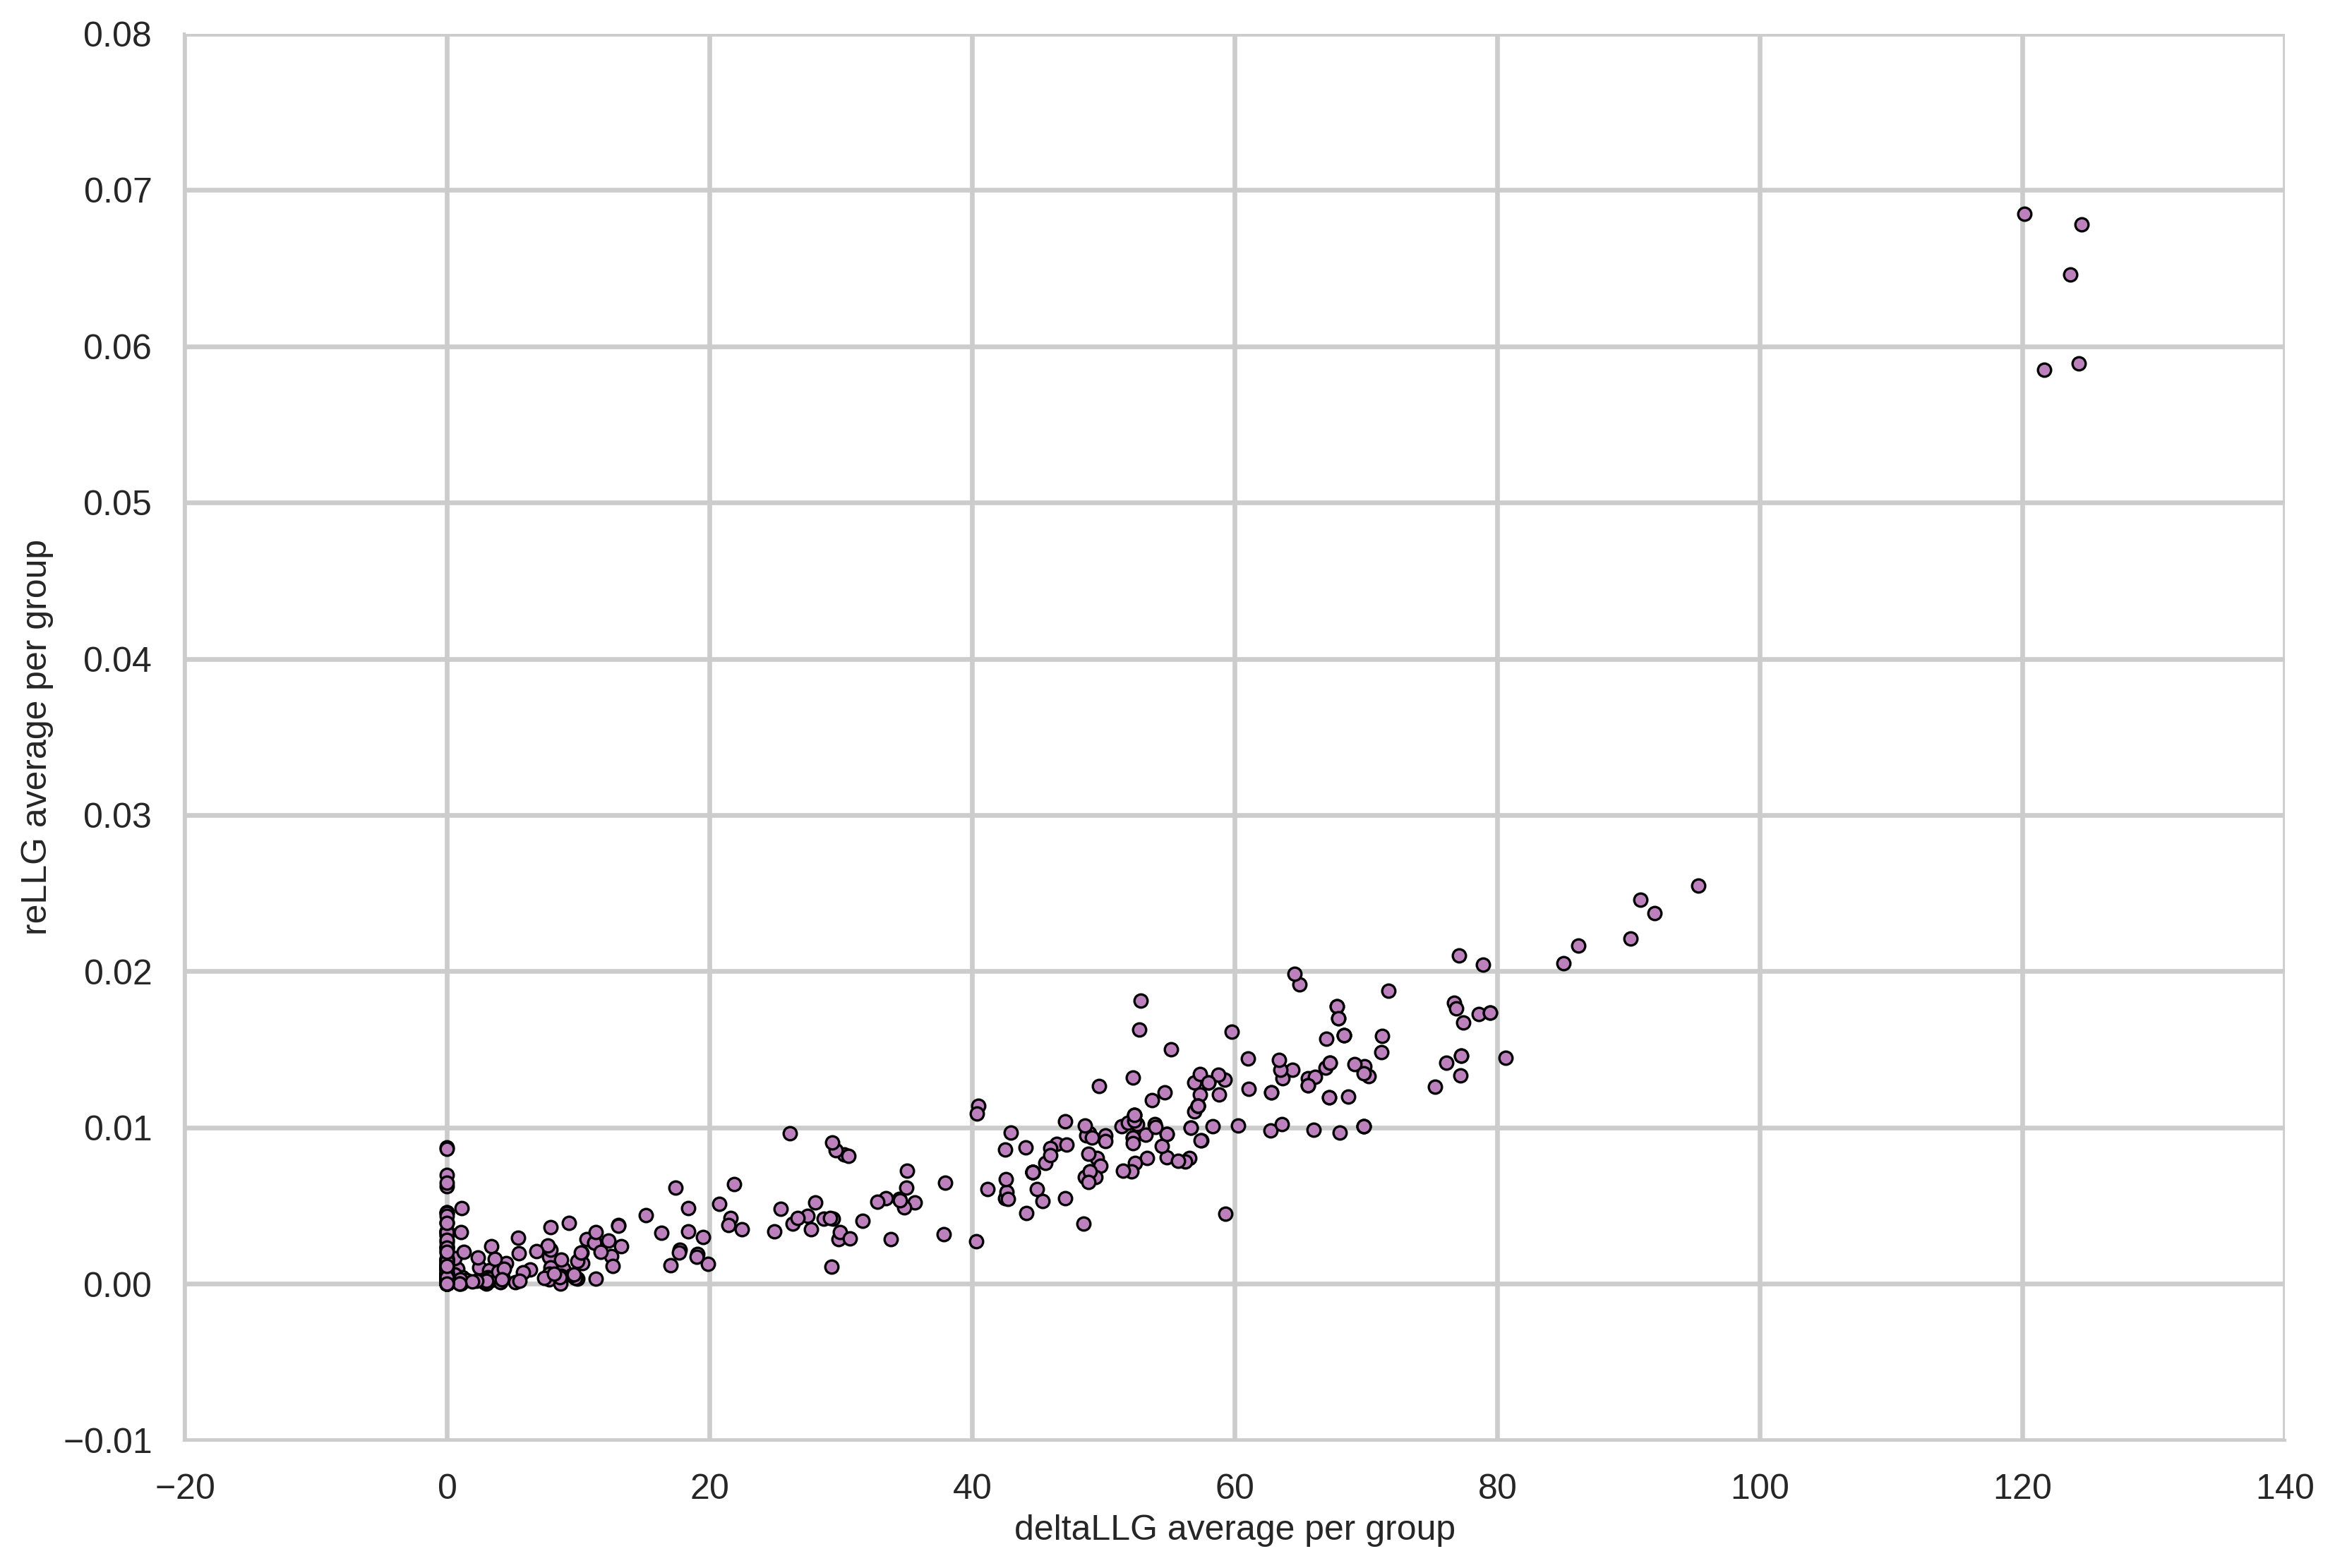

In [73]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1085-D3  TBM-hard and 1/10 of structure.
subset_llg_t1085 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1085') & df_llg_data['Model'].str.endswith('D3')]
display(subset_llg_t1085)

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1085= df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1085') & df_all_bfact_constant['Model'].str.endswith('D3')]
#display(subset_bcons_t1085)
#print("Size subset bcons",len(subset_bcons_t1085))
#merge_for_scatter_bcons_t1085 = pd.merge(subset_llg_t1085,subset_bcons_t1085)
#display(merge_for_scatter_bcons_t1085)
#print("size of merge ",merge_for_scatter_bcons_t1085)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#plotted_bcons = merge_for_scatter_bcons_t1085.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")

# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
subset_as_rmsd_t1085 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1085') & df_all_as_rmsd['Model'].str.endswith('D3')]
#display(subset_as_rmsd_t1085)
#print("Size subset as rmsd",len(subset_as_rmsd_t1085))
merge_for_scatter_as_rmsd_t1085 = pd.merge(subset_llg_t1085,subset_as_rmsd_t1085)
#display(merge_for_scatter_as_rmsd_t1085)
#print("size of merge ",len(merge_for_scatter_as_rmsd_t1085))
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1085.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")



Text(0, 0.5, 'reLLG average per group')

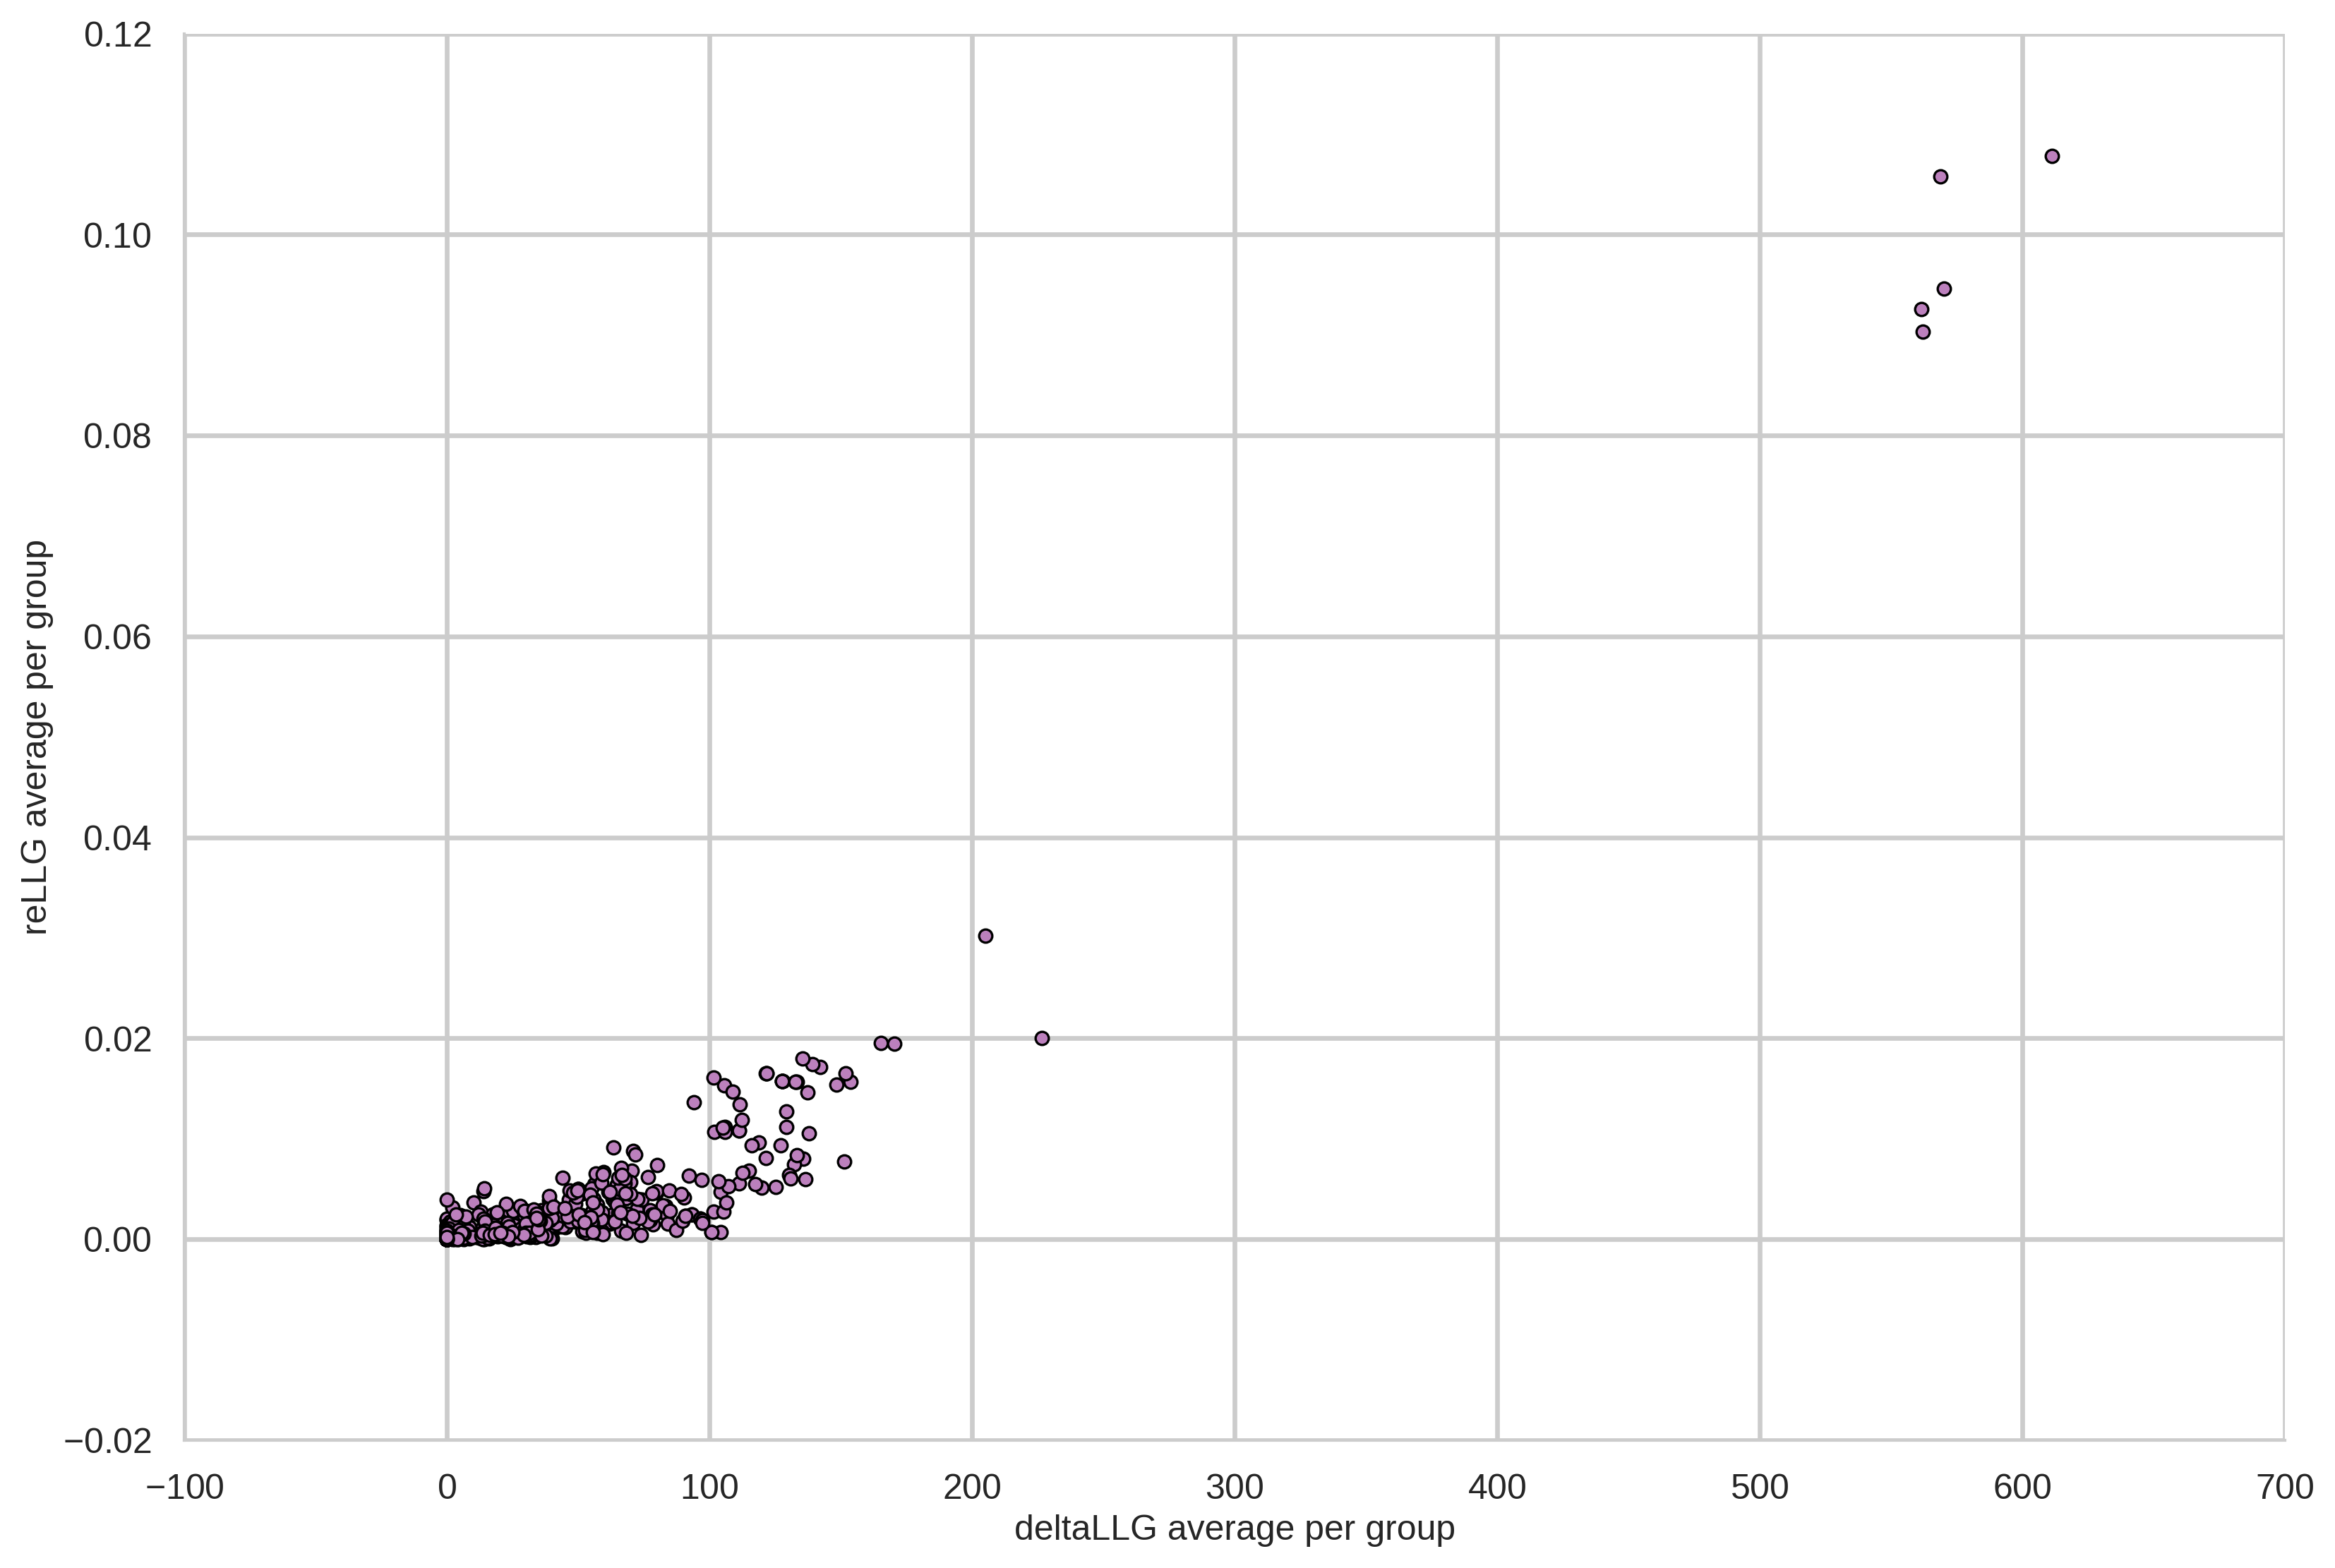

In [74]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
################################################################
# Analysis of specific targets of interest                    #
# T1032-D1:  TBM-hard case, 6 copies in a.u., data to 3.3 Å   #
###############################################################

# df_llg_data
subset_llg_t1032 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1032') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1032)
#print("Size subset llg",len(subset_llg_t1032))
#path_table_llg_1032 =  os.path.join(output_dir,'table_llg_1032.csv')
#subset_llg_t1032.to_csv(path_table_llg_1032)
#files.download(path_table_llg_1032)

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1032 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1032') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1032)
#print("Size subset bcons",len(subset_bcons_t1032))
##path_table_rellg_1032 =  os.path.join(output_dir,'table_rellg_1032.csv')
#subset_bcons_t1032.to_csv(path_table_rellg_1032)
#files.download(path_table_rellg_1032)
#merge_for_scatter_bcons_t1032 = pd.merge(subset_llg_t1032,subset_bcons_t1032)
#display(merge_for_scatter_bcons_t1032)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#print("size of merge ",merge_for_scatter_bcons_t1032)
#plotted_bcons = merge_for_scatter_bcons_t1032.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")



# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1032 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1032') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1032)
#print("Size subset as rmsd",len(subset_as_rmsd_t1032))

merge_for_scatter_as_rmsd_t1032 = pd.merge(subset_llg_t1032,subset_as_rmsd_t1032)
#display(merge_for_scatter_as_rmsd_t1032)
#print("size of merge ",len(merge_for_scatter_as_rmsd_t1032))

# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_as_rmsd = merge_for_scatter_as_rmsd_t1032.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_as_rmsd.set_xlabel("deltaLLG average per group")
plotted_as_rmsd.set_ylabel("reLLG average per group")

Text(0, 0.5, 'reLLG average per group')

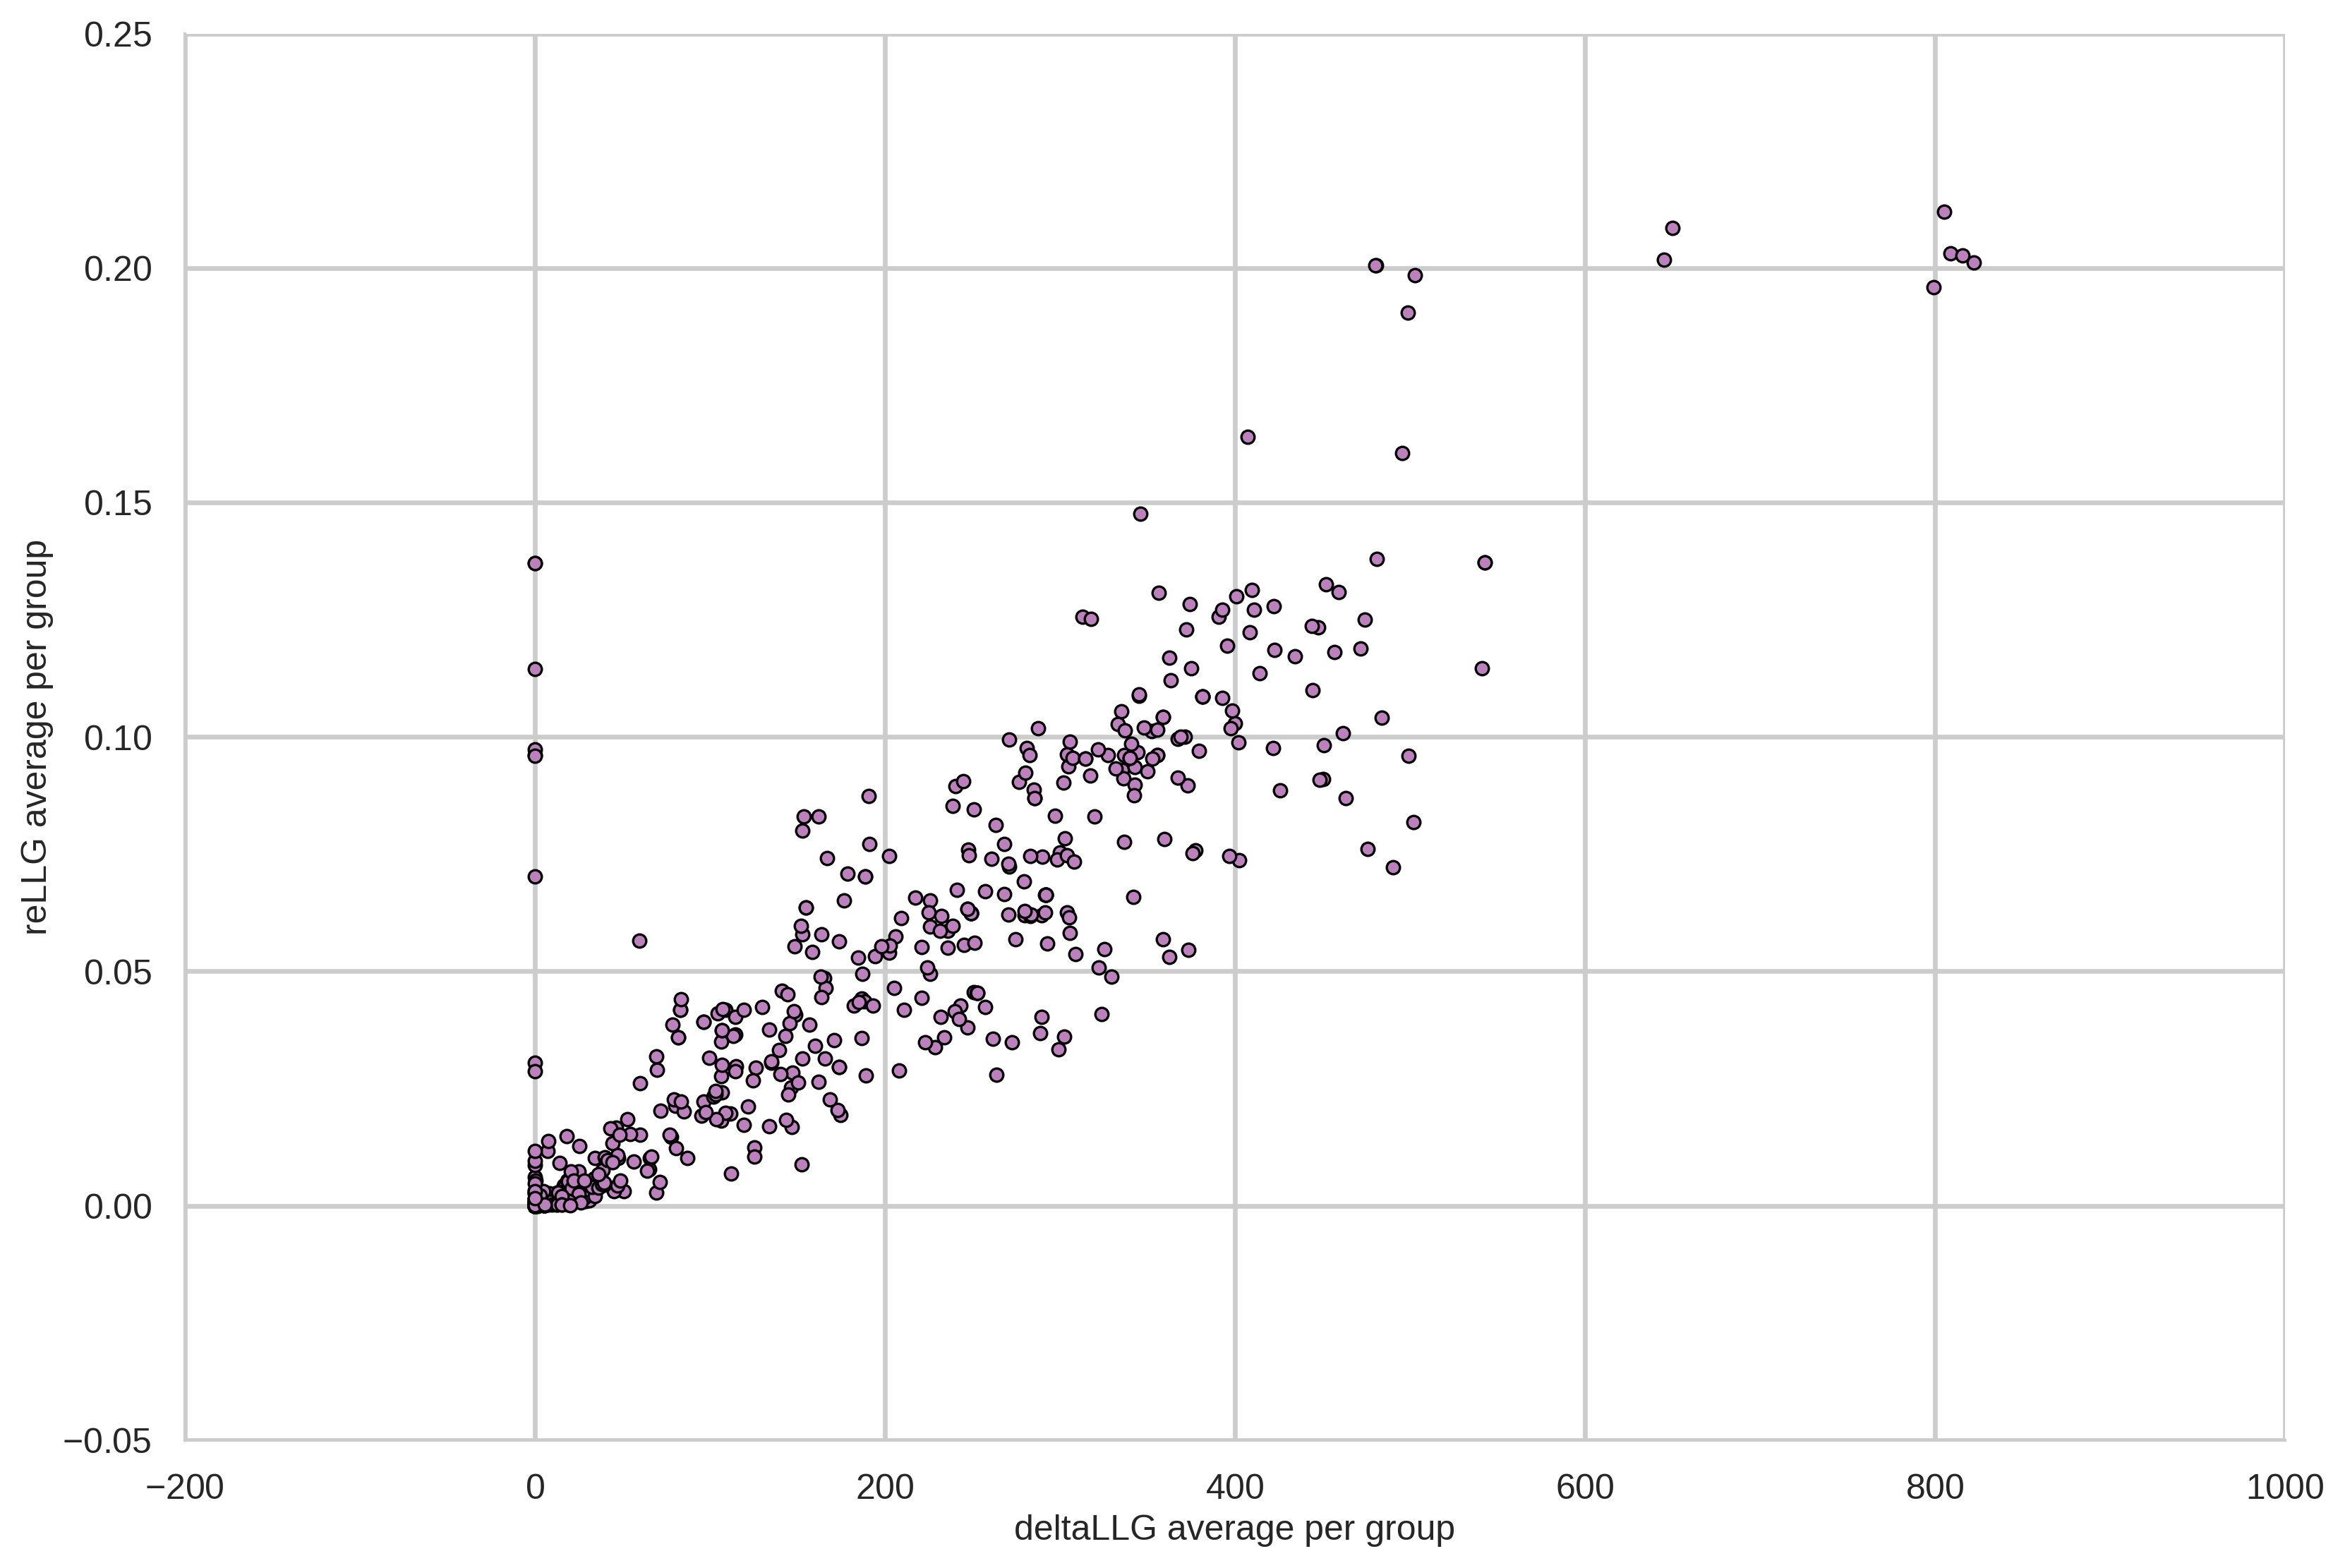

In [75]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1073-D1:  TBM-easy case, 2 copies, complete molecule, data to 1.9 Å


# df_llg_data
subset_llg_t1073 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1073') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1073)
#print("Size subset llg",len(subset_llg_t1073))


# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1073 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1073') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1073)
#print("Size subset bcons",len(subset_bcons_t1073))

#merge_for_scatter_bcons_t1073 = pd.merge(subset_llg_t1073,subset_bcons_t1073)
#display(merge_for_scatter_bcons_t1073)
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#plotted_bcons = merge_for_scatter_bcons_t1073.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')
#print("size merge ",len(merge_for_scatter_bcons_t1073))
#plotted_bcons.set_xlabel("deltaLLG average per group")
#plotted_bcons.set_ylabel("reLLG average per group")

# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1073 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1073') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1073)
#print("Size subset as rmsd",len(subset_as_rmsd_t1073))
merge_for_scatter_as_rmsd_t1073 = pd.merge(subset_llg_t1073,subset_as_rmsd_t1073)
#display(merge_for_scatter_as_rmsd_t1073)
#print("size for merge ",len(merge_for_scatter_as_rmsd_t1073))
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1073.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")



# This last part was just for seeing the outliers
#negative = (merge_for_scatter_as_rmsd_t1073.loc[(merge_for_scatter_as_rmsd_t1073['LLG_B_from_rms_deltaLLG']<=0)]).copy(deep=True)
#negative_bis = negative.loc[negative['reLLG_as_rmsd']>=0.05]
#negative_bis.sort_values(by='reLLG_as_rmsd',inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  #display(negative_bis)


Text(0, 0.5, 'reLLG average per group')

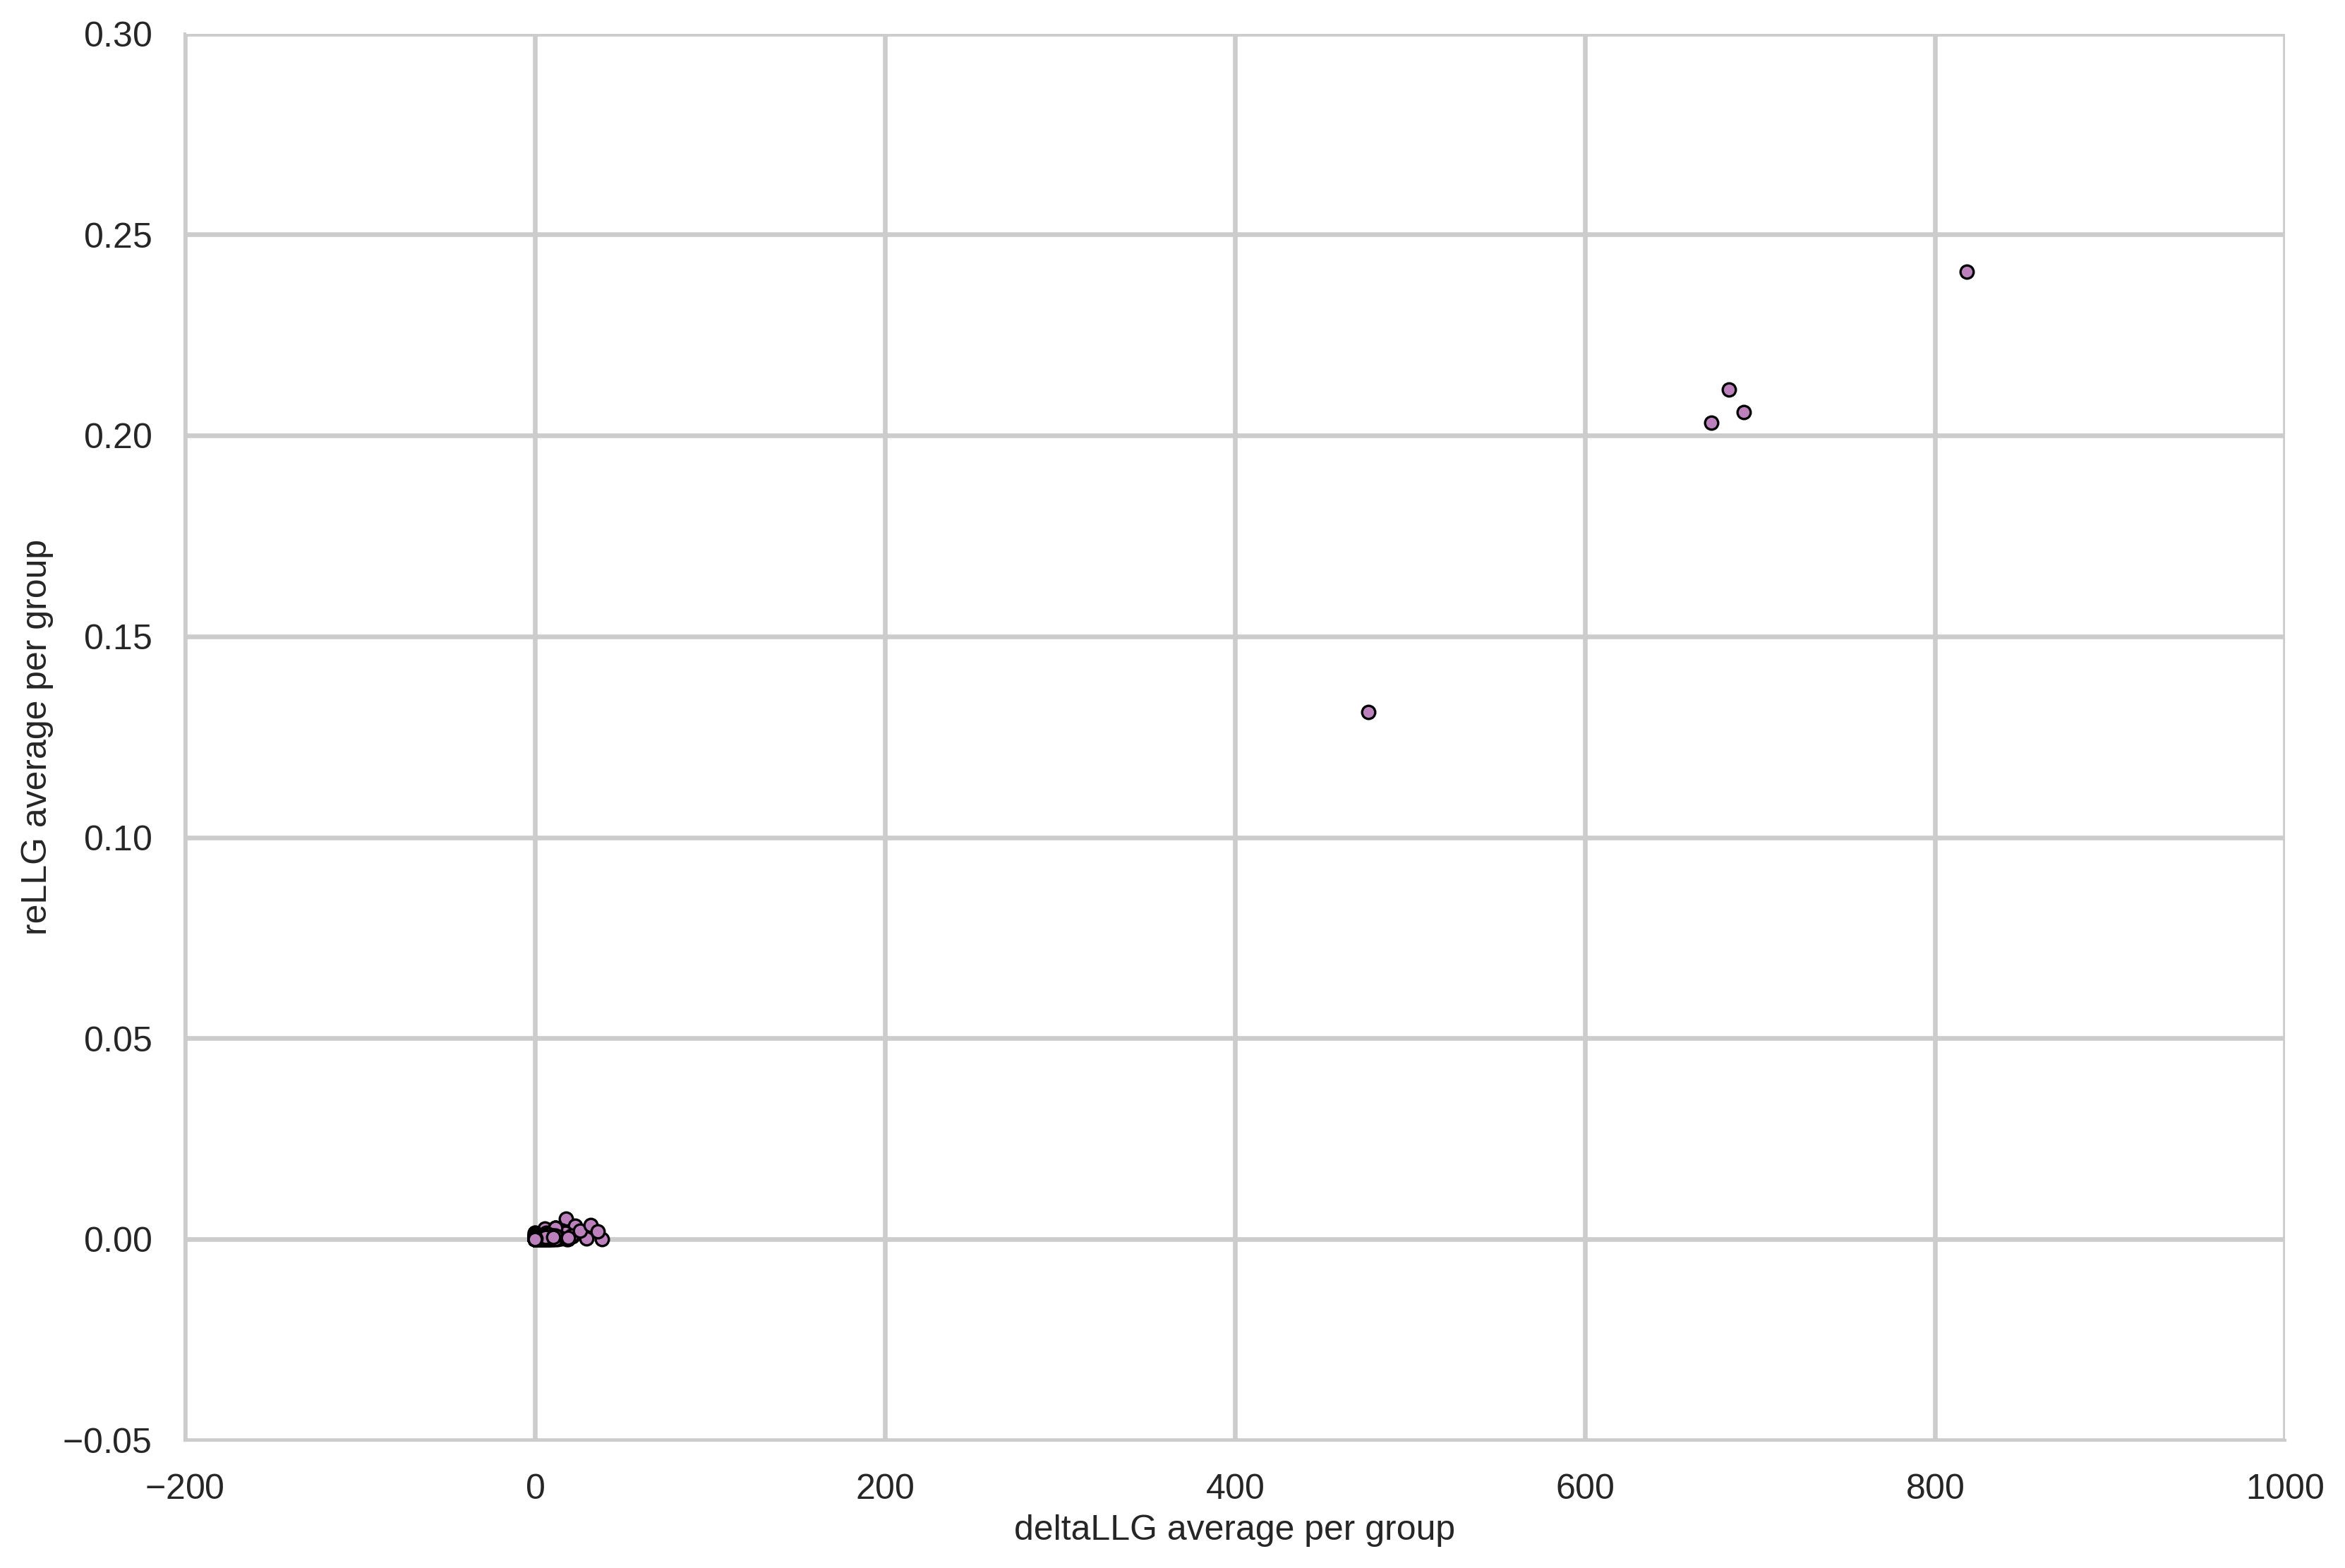

In [76]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of specific targets of interest
#T1074-D1:  FM case, 1 copy, complete molecule, data to 1.5 Å

# df_llg_data
subset_llg_t1074 = df_llg_data.loc[df_llg_data['Model'].str.startswith('T1074') & df_llg_data['Model'].str.endswith('D1')]
#display(subset_llg_t1074)
#print("Size subset llg",len(subset_llg_t1074))

# with column set to a constant bfactor
#########################################

#df_all_bfact_constant
#subset_bcons_t1074 = df_all_bfact_constant.loc[df_all_bfact_constant['Model'].str.startswith('T1074') & df_all_bfact_constant['Model'].str.endswith('D1')]
#display(subset_bcons_t1074)
#print("Size subset bcons",len(subset_bcons_t1074))
#merge_for_scatter_bcons_t1074 = pd.merge(subset_llg_t1074,subset_bcons_t1074)
#display(merge_for_scatter_bcons_t1074)
#print("size of merge ",len(merge_for_scatter_bcons_t1074))
# columns of interest for this scatter will be LLG_const_B_deltaLLG and reLLG_bfactor_constant
#merge_for_scatter_bcons_t1074.plot.scatter(x='LLG_const_B_deltaLLG',y='reLLG_bfactor_constant')


# with column converted from rmsd to bfactor (assuming groups put error coordinates)
####################################################################################

#df_all_as_rmsd
# This line below if we would be filtering by groups
#df_all_as_rmsd_groupdel =  df_all_as_rmsd.loc[~df_all_as_rmsd['Name_Group'].isin(list_to_eliminate)]
subset_as_rmsd_t1074 = df_all_as_rmsd.loc[df_all_as_rmsd['Model'].str.startswith('T1074') & df_all_as_rmsd['Model'].str.endswith('D1')]
#display(subset_as_rmsd_t1074)
#print("Size subset as rmsd",len(subset_as_rmsd_t1074))
merge_for_scatter_as_rmsd_t1074 = pd.merge(subset_llg_t1074,subset_as_rmsd_t1074)
#display(merge_for_scatter_as_rmsd_t1074)
#print("size of merge ",merge_for_scatter_as_rmsd_t1074)
# columns of interest for this scatter will be LLG_B_from_rms_deltaLLG and reLLG_as_rmsd
plotted_rmsd = merge_for_scatter_as_rmsd_t1074.plot.scatter(x="LLG_B_from_rms_deltaLLG",y='reLLG_as_rmsd')
plotted_rmsd.set_xlabel("deltaLLG average per group")
plotted_rmsd.set_ylabel("reLLG average per group")


# This part is for seeing the top performers
#supergood = (merge_for_scatter_as_rmsd_t1074.loc[(merge_for_scatter_as_rmsd_t1074['LLG_B_from_rms_deltaLLG']>400)]).copy(deep=True)
#supergood_bis = supergood.loc[supergood['reLLG_as_rmsd']>=0.1]
#supergood_bis.sort_values(by='reLLG_as_rmsd',inplace=True,ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#  display(supergood_bis)



In [77]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-poster'])
plt.rcParams['font.family'] = 'Arial'

# Overall ranking of the groups by their average z-score considering only their model 1

###########
# AS_RMSD #
###########

#df_mod1_as_rmsd = df_all_as_rmsd[df_all_as_rmsd['Self_rank']== '1'] # Already done in a previous cell

#print("BEFORE FILTERING GROUPS BELOW 2/3",len(df_mod1_as_rmsd))
# Before doing the ranking, make sure to eliminate those groups marked in list_to_eliminate
df_mod1_as_rmsd =  df_mod1_as_rmsd.loc[~df_mod1_as_rmsd['Name_Group'].isin(list_to_eliminate)]
#print("AFTER FILTERING GROUPS BELOW 2/3",len(df_mod1_as_rmsd))


#display(df_mod1_as_rmsd)
# For every target_evaluation that a group did not cover we need to add a dummy model 1 and penalise it with a -2

def include_penalization(dati,treatment,list_target_evaluation):
  print("BEFORE ADDING PENALIZATION",len(dati))
  list_dataframes_to_concat = []
  by_groups = dati.groupby(['Name_Group'])
  for group in by_groups:
    #print("\n\nChecking targets evaluated for group  ",group[0])
    targets_evaluated_by_group = group[1]['Target_Evaluation'].unique() 
    #print("Targets evaluated by this group are ",len(targets_evaluated_by_group))
    #print(targets_evaluated_by_group)
    diff = set(list_target_evaluation)-set(targets_evaluated_by_group)
    if len(diff) > 0:
      #print("Diff is ",diff)
      #print("This group did not predict the targets:")
      # we then need to add a row per each target not evaluated
      new_df = group[1].copy(deep=True)
      for not_evaluated in diff:
        #print(not_evaluated)
        new_df = new_df.append({'Model': "dummy"+str(not_evaluated),"reLLG_"+treatment:0, "status_"+treatment:0,"Target_Evaluation":not_evaluated,"Target":not_evaluated[:5],"Self_rank":1,"Group":"None","reLLG_"+treatment+"_zscore":-2, "Name_Group":group[0],"Has_Xray_Data":False, "Has_EM_Data":False,"Experimental_Method":"None"},ignore_index=True)
        #print("AFTER")
      #display(new_df)
      list_dataframes_to_concat.append(new_df)
      #break
    else: # we will concatenate as it is
      same_df = group[1].copy(deep=True)
      #display(same_df)
      list_dataframes_to_concat.append(same_df)
      #break
  concatenated = pd.concat(list_dataframes_to_concat)
  print("AFTER ADDING PENALIZATION",len(concatenated))
  #display(concatenated)
  return concatenated


temp_data = df_mod1_as_rmsd.copy(deep=True)
df_mod1_as_rmsd = include_penalization(temp_data,'as_rmsd')


BEFORE ADDING PENALIZATION 9648
AFTER ADDING PENALIZATION 10080


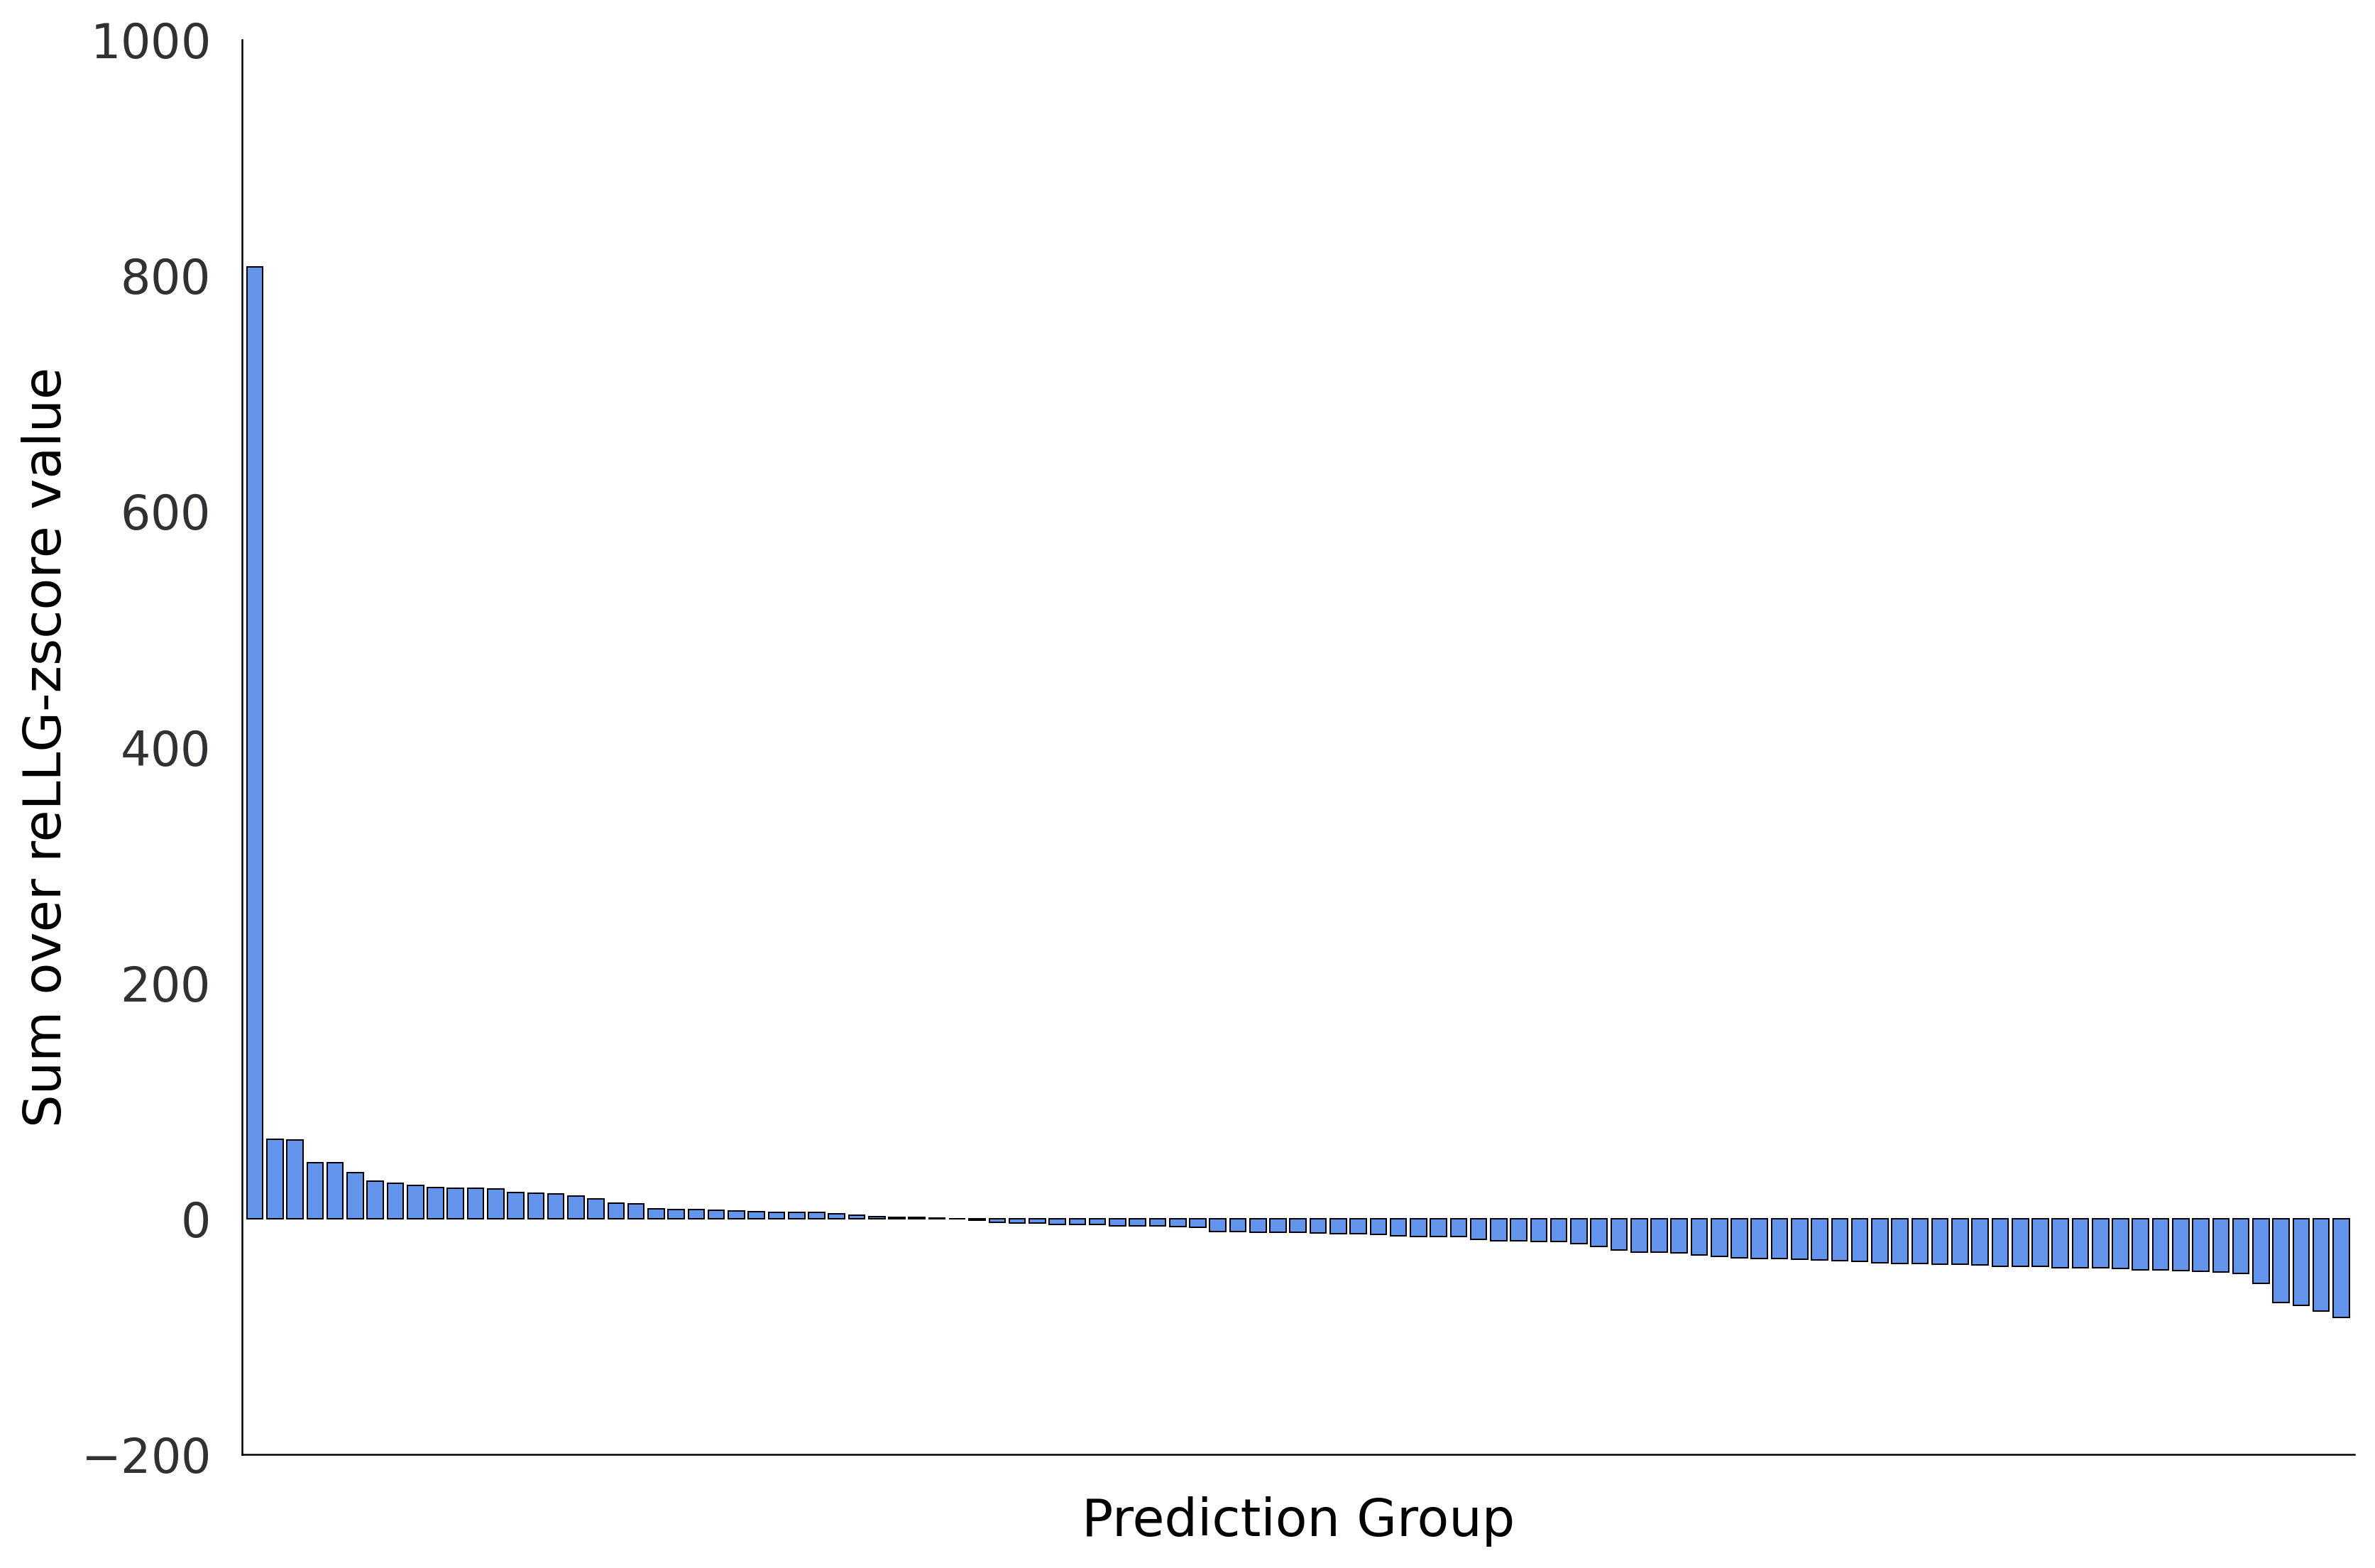

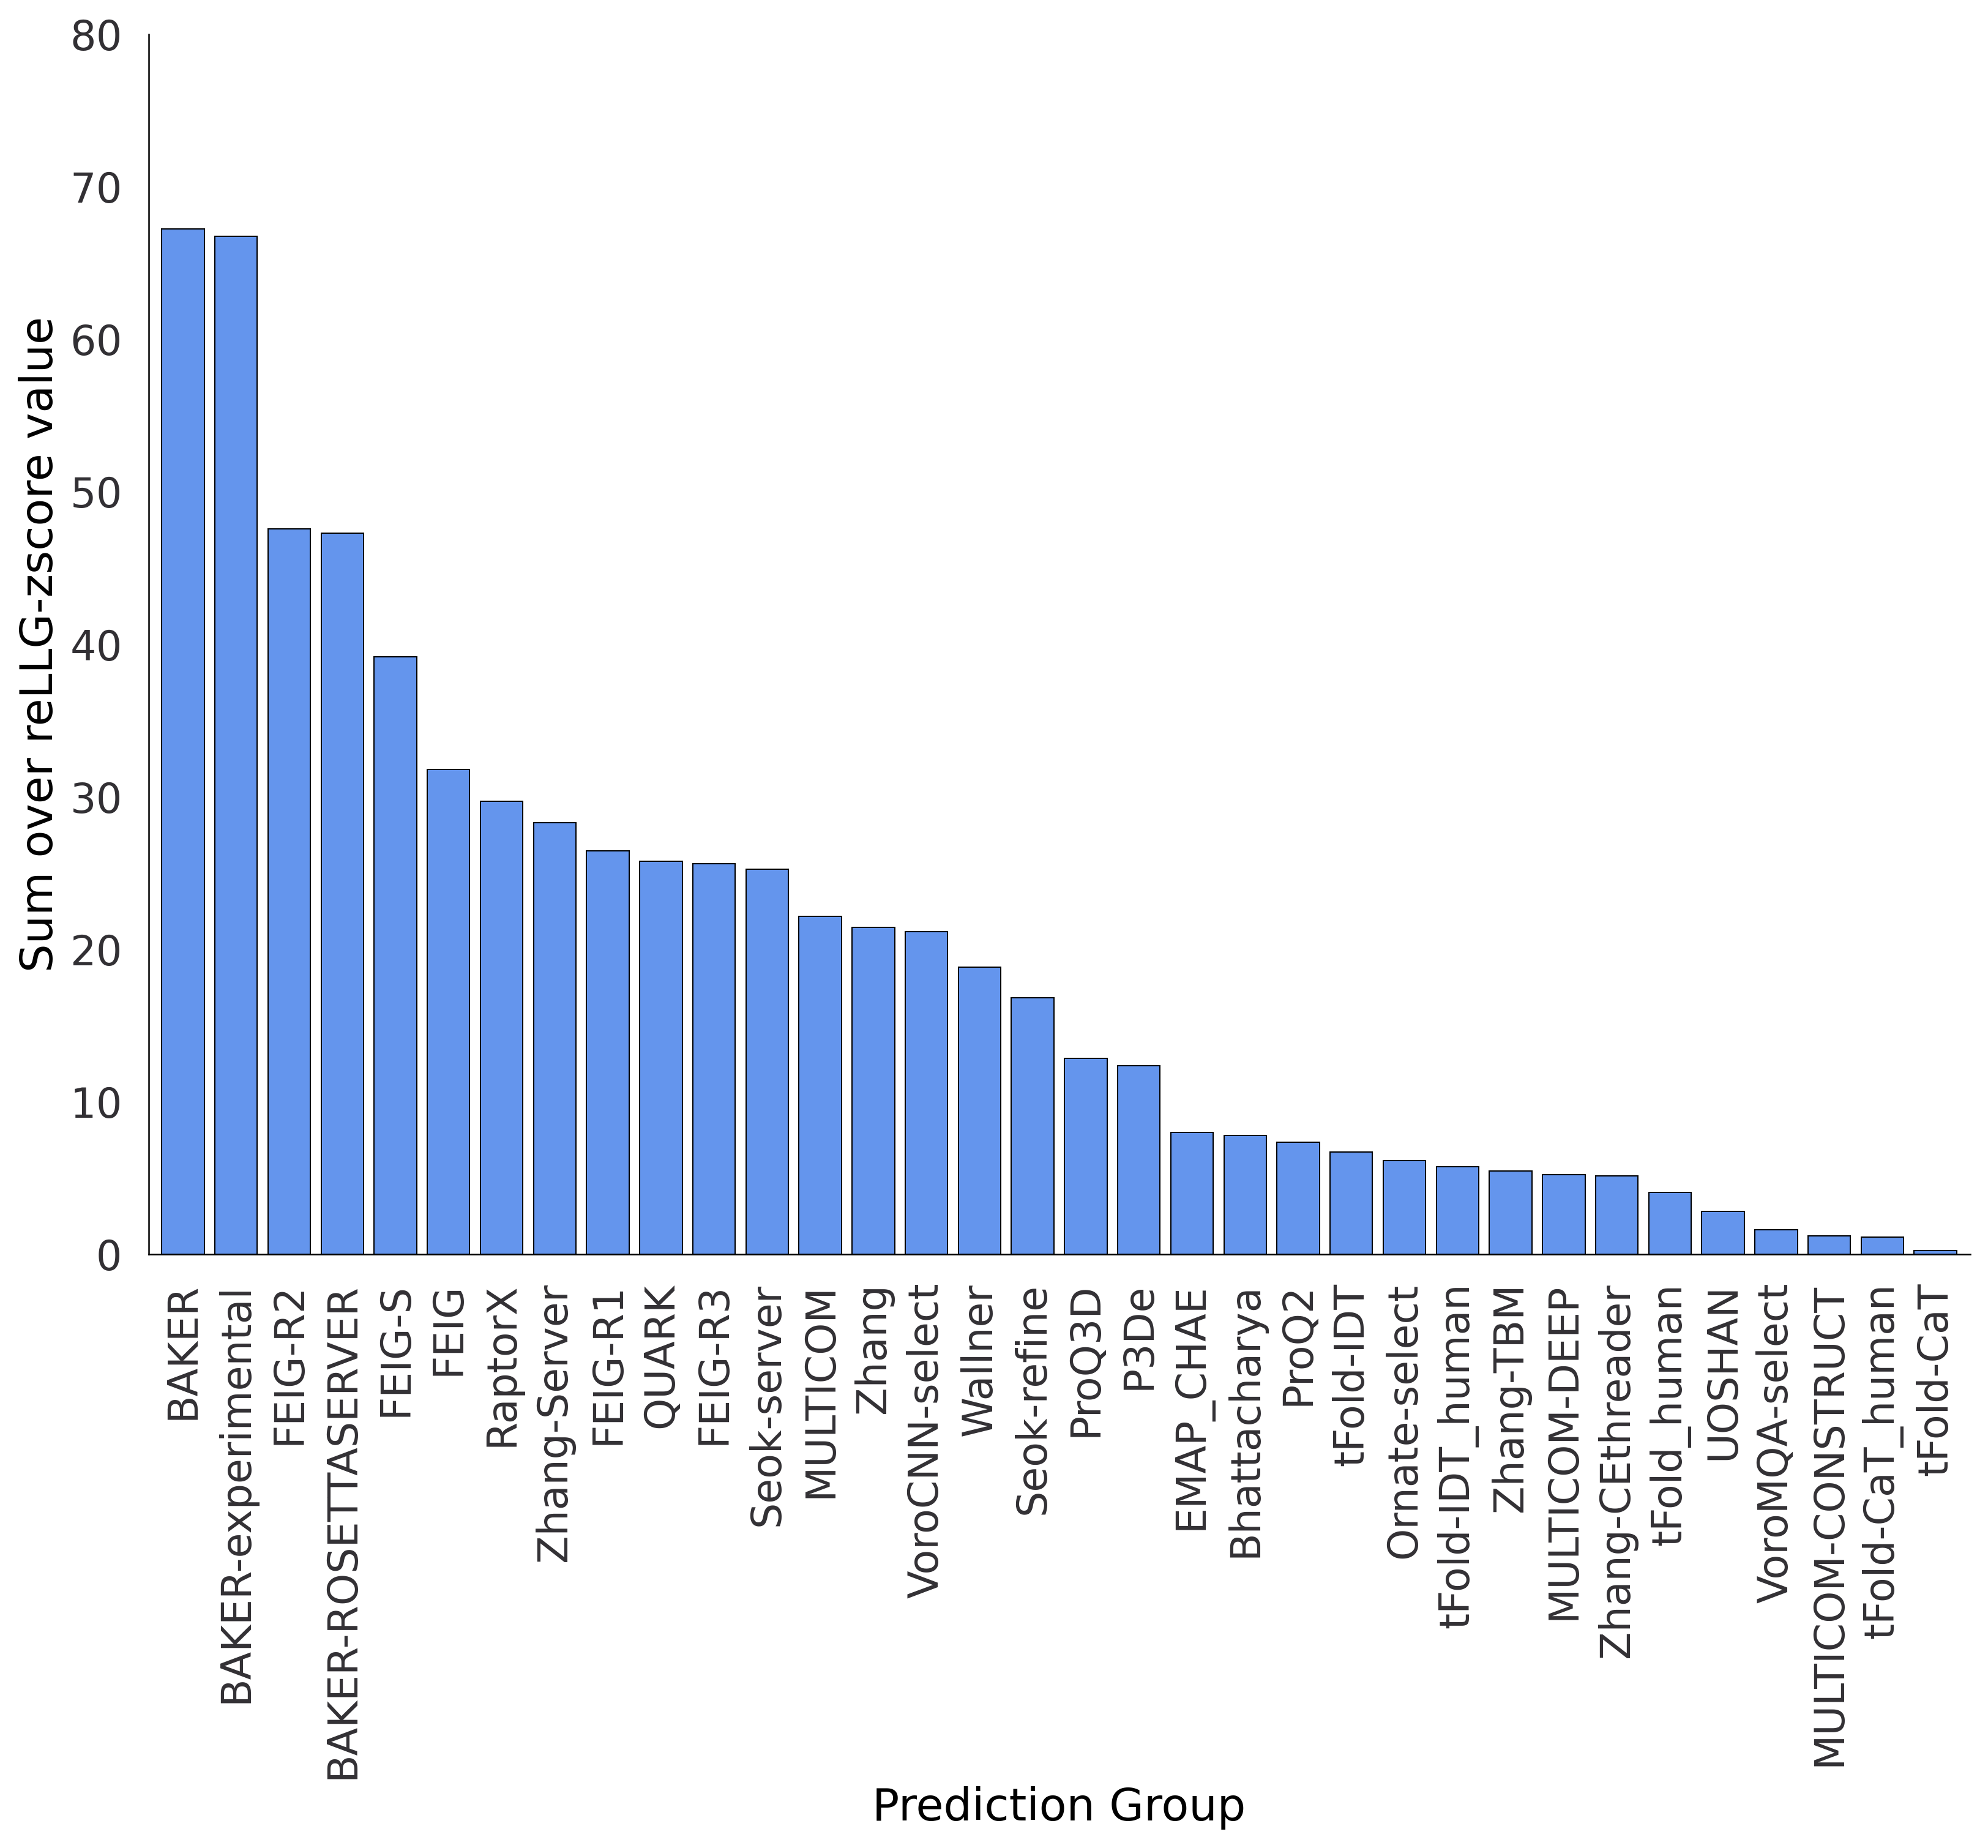

['T1024-D1' 'T1024-D2' 'T1030-D1' 'T1030-D2' 'T1032-D1' 'T1034-D1'
 'T1038-D1' 'T1038-D2' 'T1046s1-D1' 'T1046s2-D1' 'T1049-D1' 'T1050-D1'
 'T1050-D2' 'T1050-D3' 'T1052-D1' 'T1052-D2' 'T1052-D3' 'T1053-D1'
 'T1053-D2' 'T1054-D1' 'T1056-D1' 'T1058-D1' 'T1058-D2' 'T1064-D1'
 'T1065s1-D1' 'T1065s2-D1' 'T1067-D1' 'T1070-D1' 'T1070-D2' 'T1070-D3'
 'T1070-D4' 'T1073-D1' 'T1074-D1' 'T1079-D1' 'T1080-D1' 'T1082-D1'
 'T1083-D1' 'T1084-D1' 'T1085-D1' 'T1085-D2' 'T1085-D3' 'T1086-D1'
 'T1086-D2' 'T1087-D1' 'T1089-D1' 'T1090-D1' 'T1091-D1' 'T1091-D2'
 'T1091-D3' 'T1091-D4' 'T1100-D1' 'T1100-D2' 'T1101-D1' 'T1101-D2']


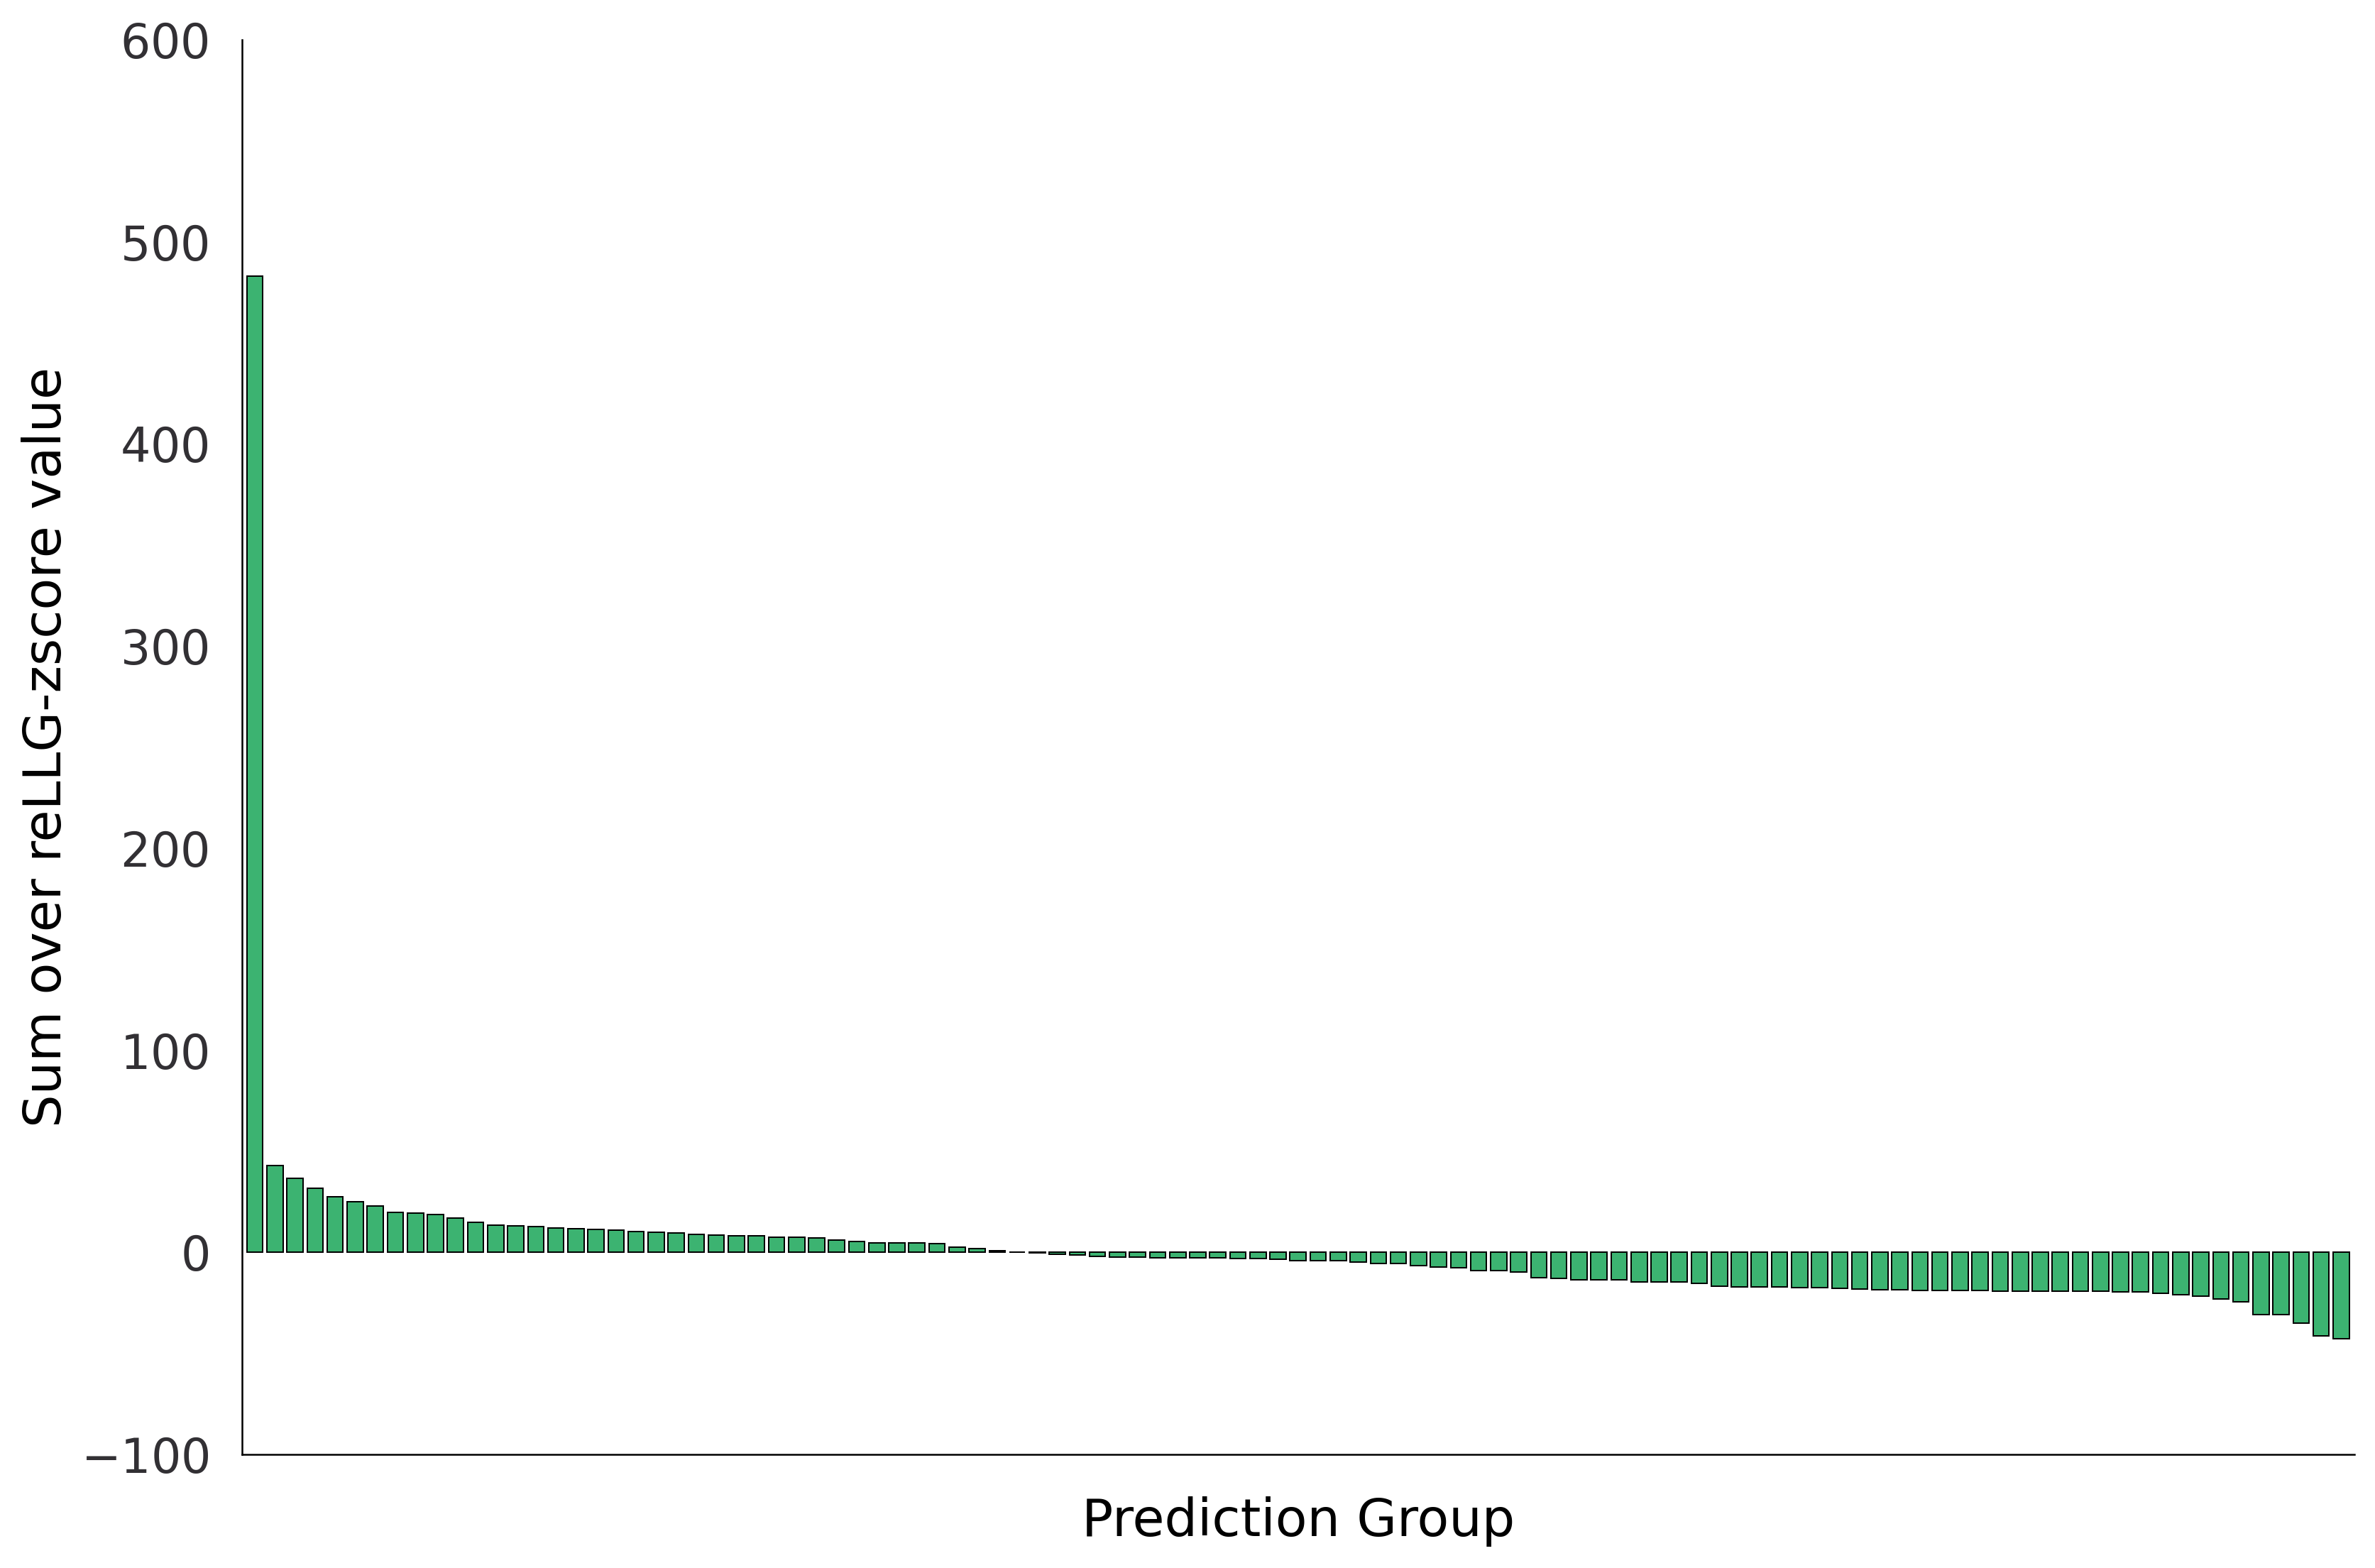

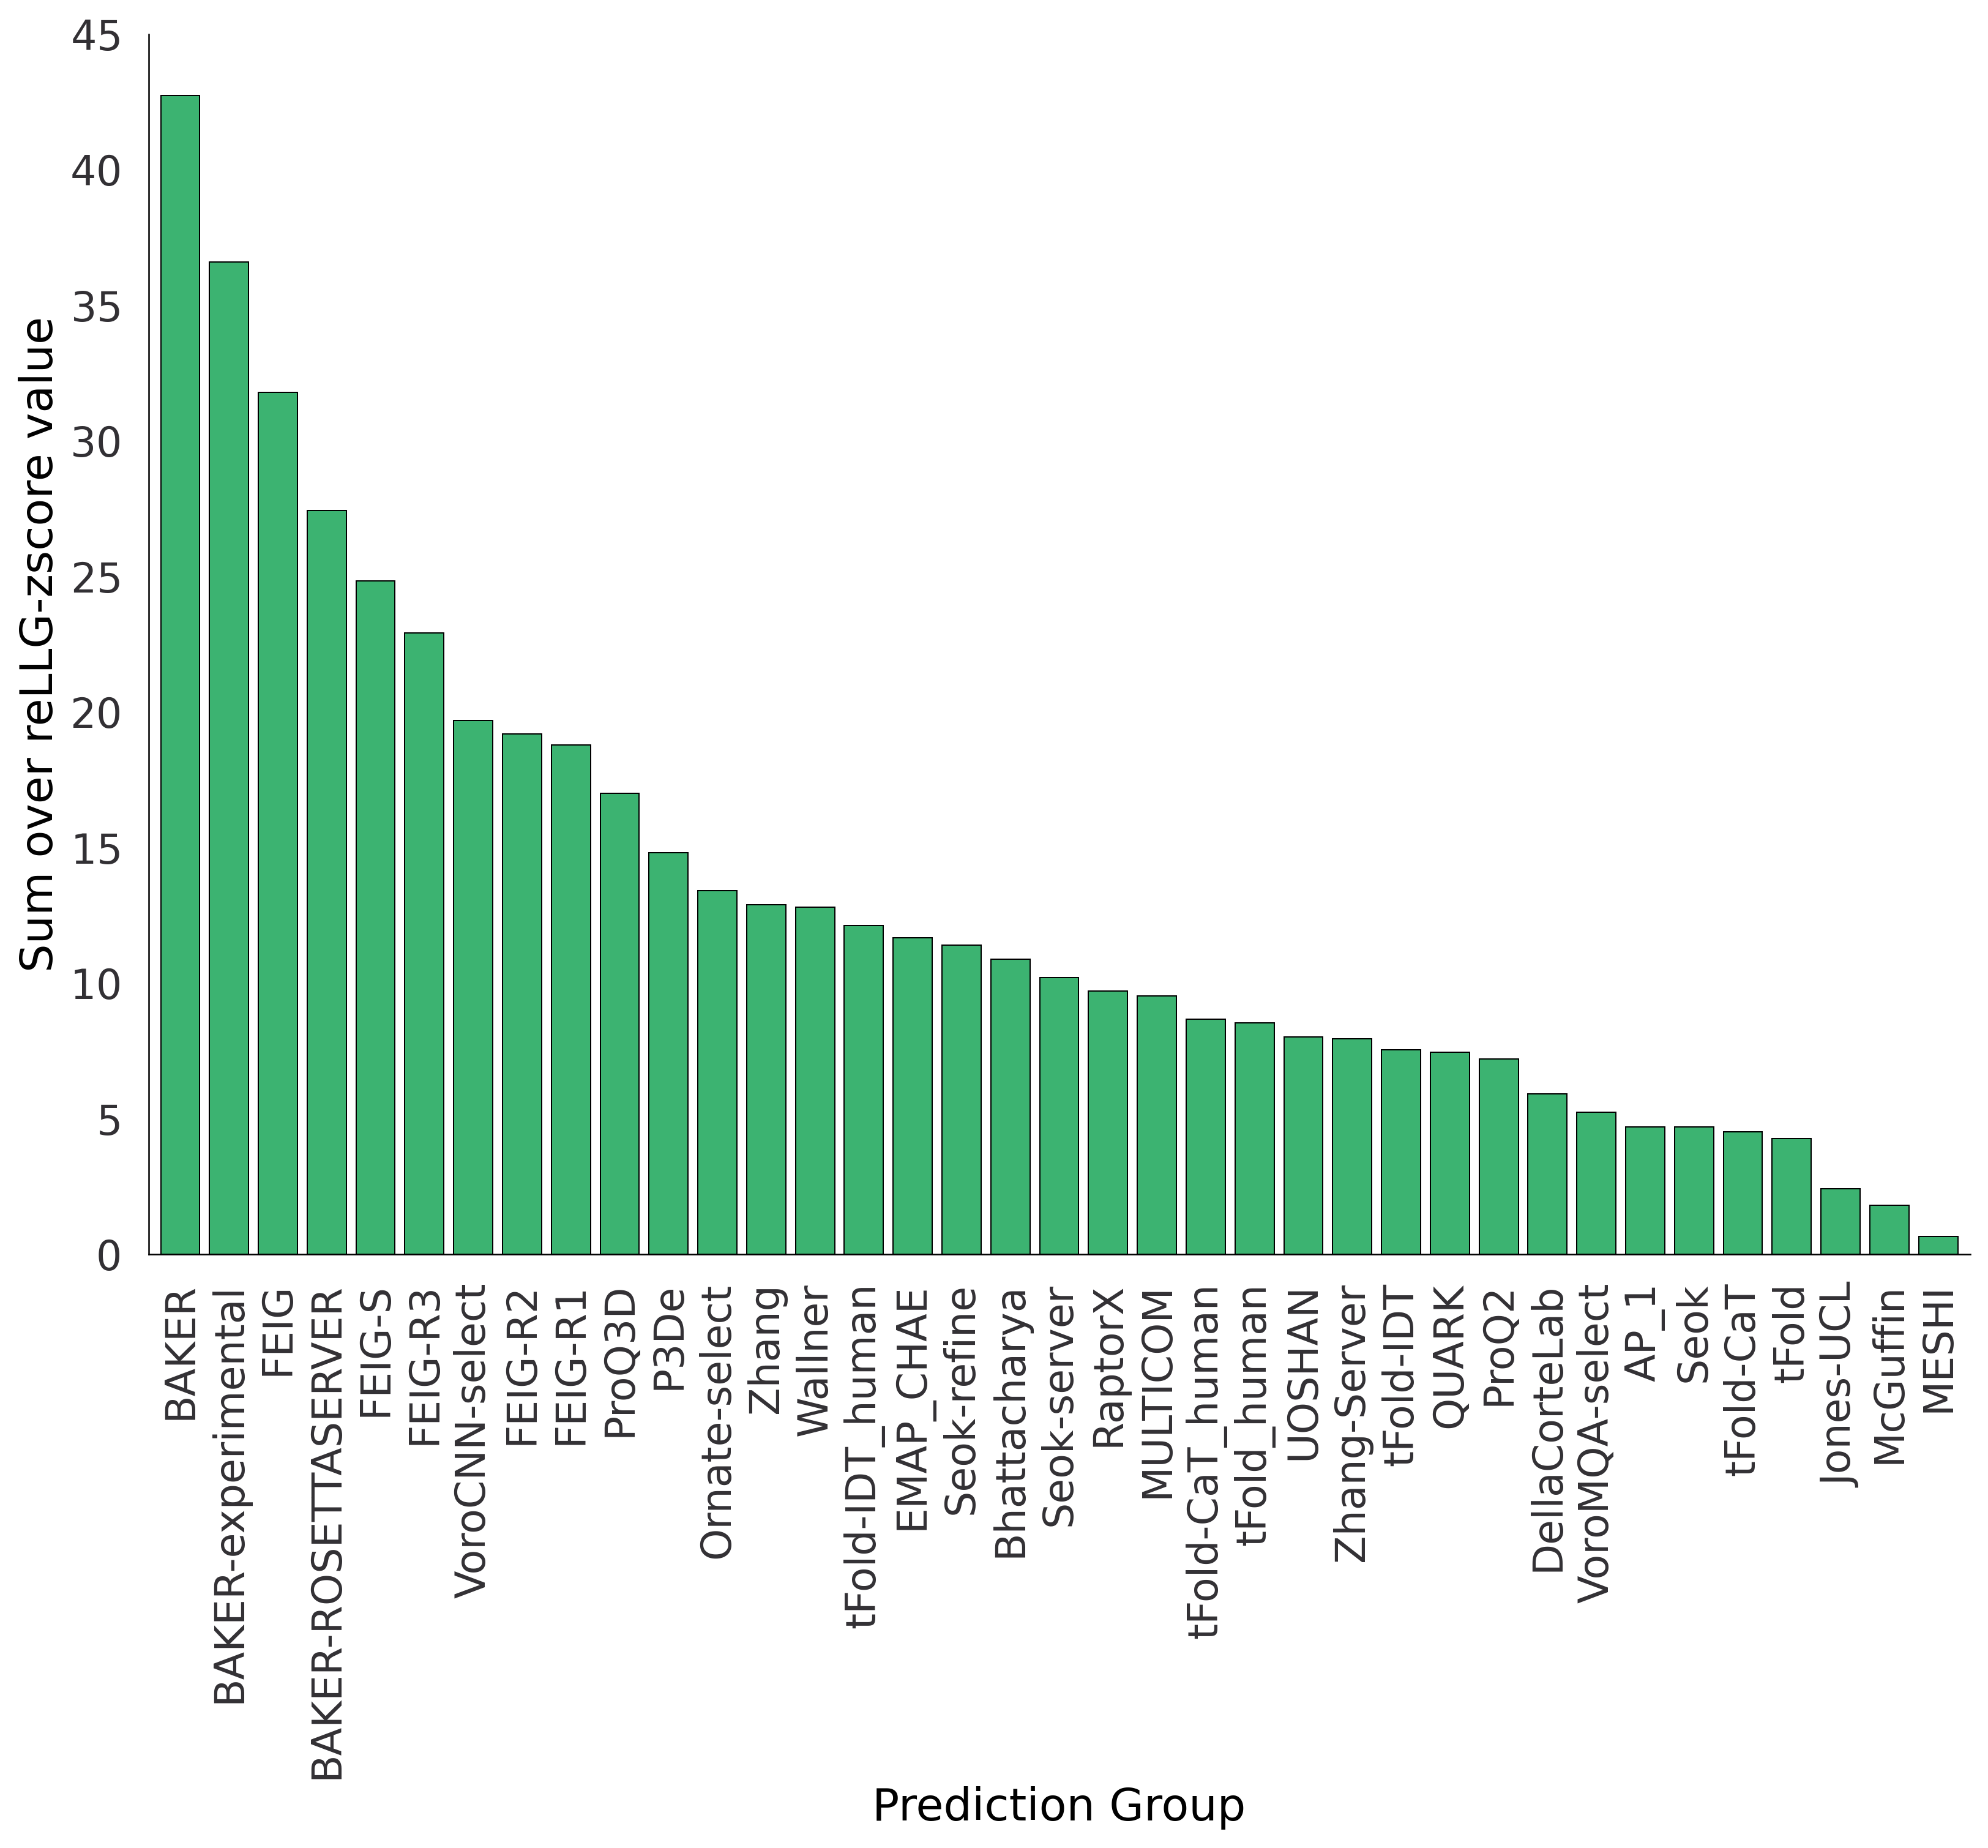

In [78]:
# Rank on the zscore and using the sum (already using penalization)
rank_model_1_as_rmsd_zscore_sum, plot_rank_model_1_as_rmsd_zscore_sum = compute_ranking_and_plot(df_mod1_as_rmsd,'reLLG_as_rmsd_zscore','sum')
# We can now modify the plot
plot_rank_model_1_as_rmsd_zscore_sum.set_xticklabels([])
plot_rank_model_1_as_rmsd_zscore_sum.set_xlabel("Prediction Group")
plot_rank_model_1_as_rmsd_zscore_sum.set_ylabel("Sum over reLLG-zscore value")
plt.show()
# now a version without alphafold and the negatives
filtered_df = df_mod1_as_rmsd[df_mod1_as_rmsd['Name_Group']!="AlphaFold2"]
#display(filtered_df)
rank_filtered, plot_rank_model_1_filtered = compute_ranking_and_plot(filtered_df,'reLLG_as_rmsd_zscore','sum',filter_negative=True)
plot_rank_model_1_filtered.set_xlabel("Prediction Group")
plot_rank_model_1_filtered.set_ylabel("Sum over reLLG-zscore value")
plt.show()


# Now do the ranking only with those targets for which there is data for doing the llg calculation
print(list_subset_targets_with_llg_data)
filtered_df_llg = df_mod1_as_rmsd.copy(deep=True) 
#print('Before')
#display(filtered_df_llg)
filtered_df_llg = filtered_df_llg.loc[filtered_df_llg['Target_Evaluation'].isin(list_subset_targets_with_llg_data)]
#print('After')
#display(filtered_df_llg)

rank_model_1_as_rmsd_zscore_sum_LLG, plot_rank_model_1_as_rmsd_zscore_sum_LLG = compute_ranking_and_plot(filtered_df_llg,'reLLG_as_rmsd_zscore','sum',color='mediumseagreen')
# We can now modify the plot
plot_rank_model_1_as_rmsd_zscore_sum_LLG.set_xticklabels([])
plot_rank_model_1_as_rmsd_zscore_sum_LLG.set_xlabel("Prediction Group")
plot_rank_model_1_as_rmsd_zscore_sum_LLG.set_ylabel("Sum over reLLG-zscore value")
plt.show()
# now a version without alphafold and the negatives
filtered_df_noalpha = filtered_df_llg[filtered_df_llg['Name_Group']!="AlphaFold2"]
rank_filtered_LLG, plot_rank_model_1_filtered_LLG = compute_ranking_and_plot(filtered_df_noalpha,'reLLG_as_rmsd_zscore','sum',filter_negative=True,color='mediumseagreen')
plot_rank_model_1_filtered_LLG.set_xlabel("Prediction Group")
plot_rank_model_1_filtered_LLG.set_ylabel("Sum over reLLG-zscore value")
plt.show()


In [85]:
########################
# AS BFACTOR CONSTANT  #
########################

# prepare and filter this dataset
df_mod1_bfac_const = df_all_bfact_constant[df_all_bfact_constant['Self_rank']== '1']
df_mod1_bfac_const = df_mod1_bfac_const.loc[~df_mod1_bfac_const['Name_Group'].isin(list_to_eliminate)]

temp_data = df_mod1_bfac_const.copy(deep=True)
#display(temp_data)
df_mod1_bfac_const = include_penalization(temp_data,'bfactor_constant')

BEFORE ADDING PENALIZATION 9648
AFTER ADDING PENALIZATION 10080


Text(0, 0.5, 'reLLG average by group on NMR targets')

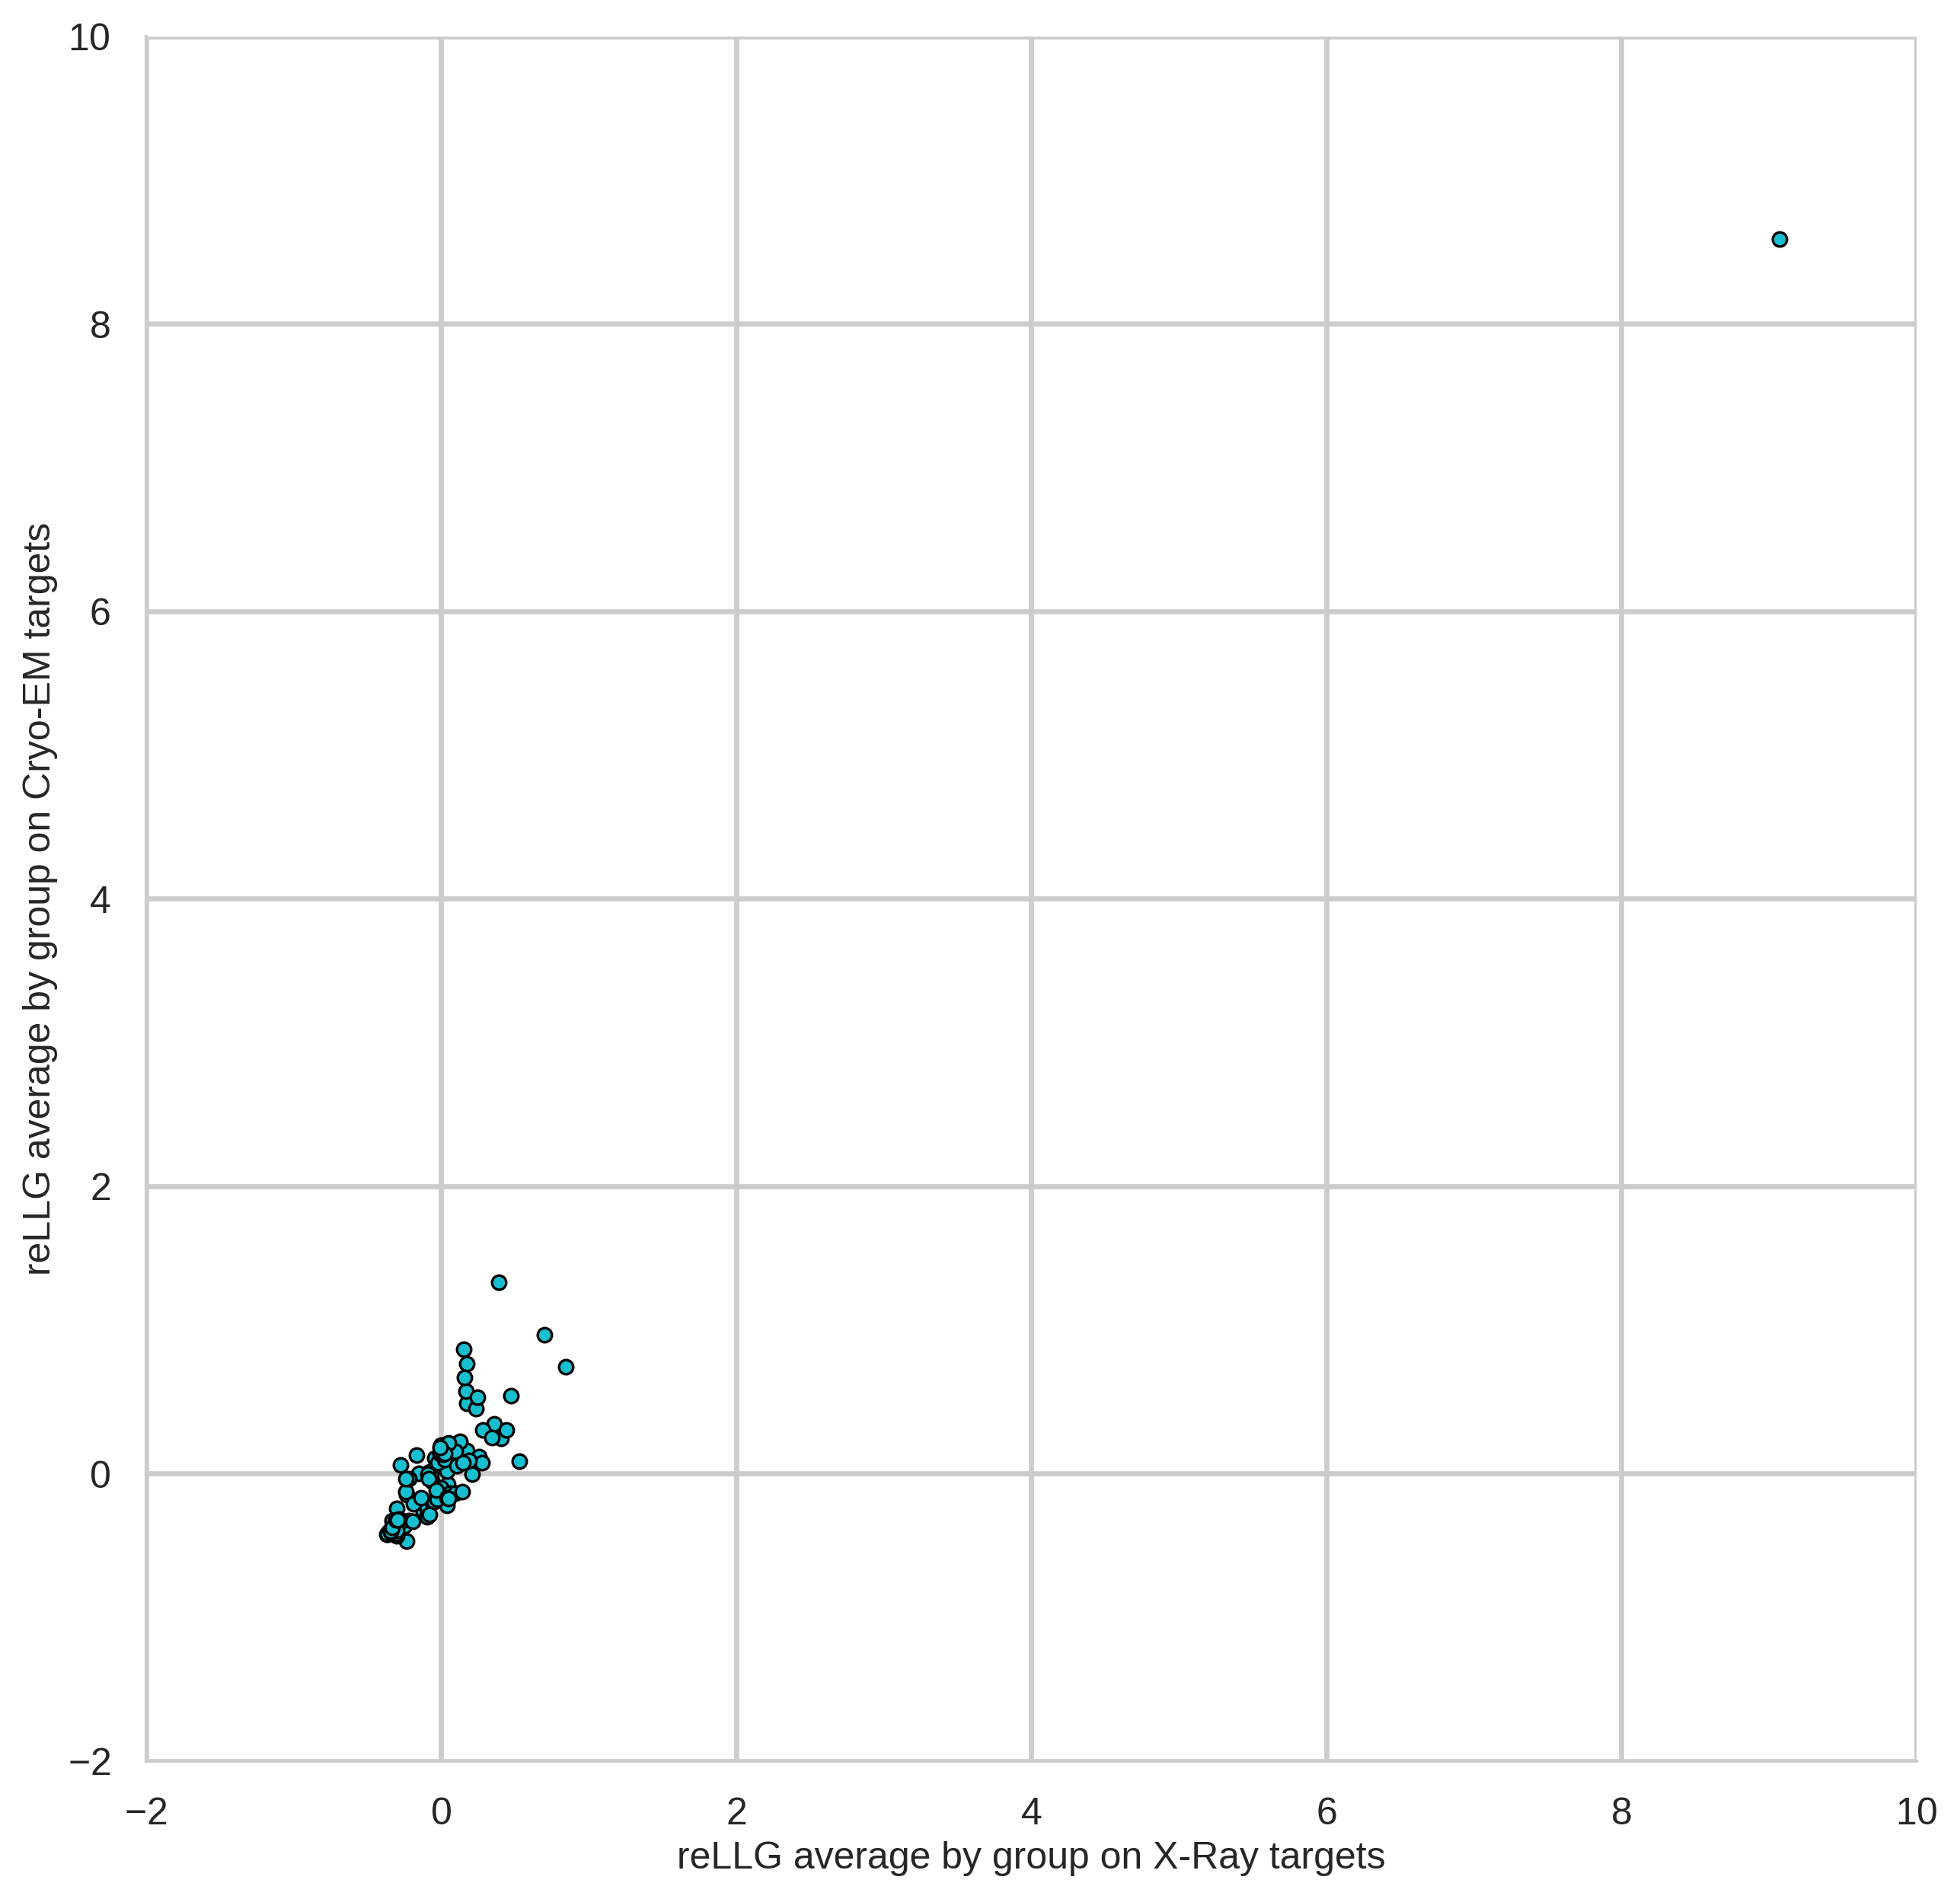

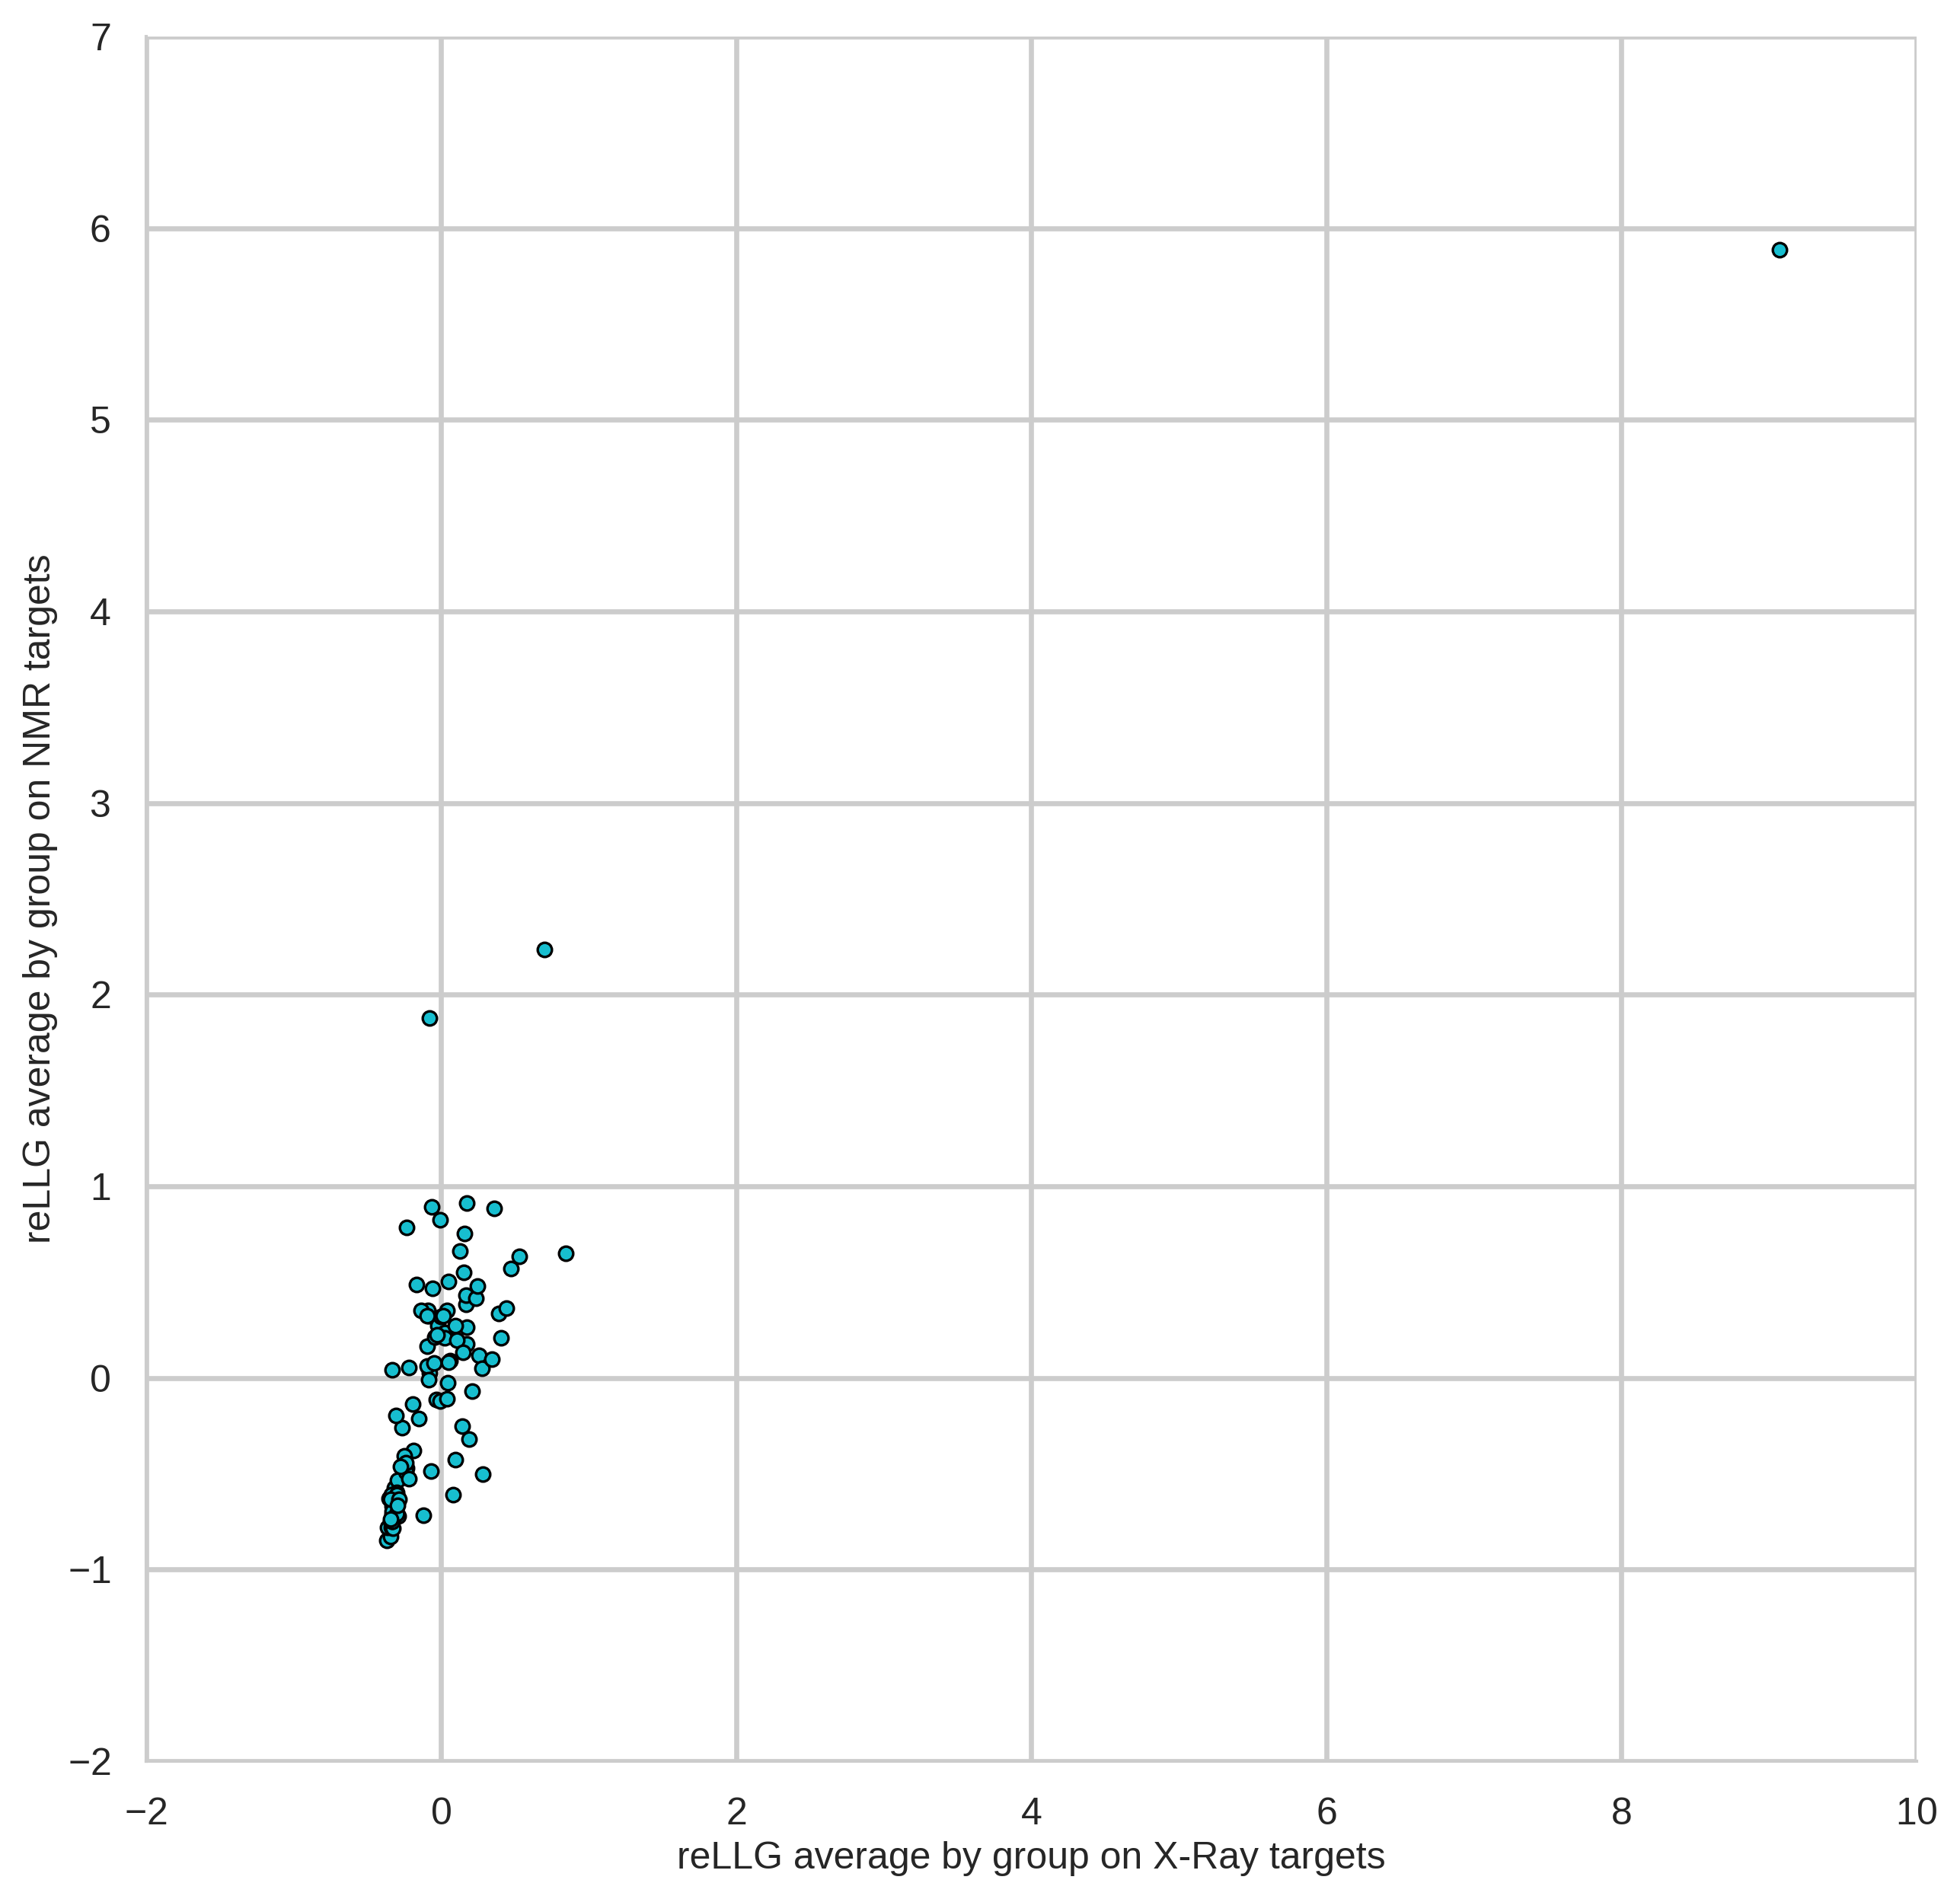

In [80]:
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])
# Analysis of the effect on the score on the kind of experimental method

# Considering only the model_1
# As rmsd treatment
#display(df_mod1_as_rmsd)
grouped = df_mod1_as_rmsd.groupby(df_mod1_as_rmsd['Experimental_Method'])
mod1rmsd_xray = grouped.get_group("X-ray")
mod1rmsd_em = grouped.get_group("Cryo-EM")
mod1rmsd_nmr = grouped.get_group("NMR")
#display(mod1rmsd_xray)
#display(mod1rmsd_em)
#display(mod1rmsd_nmr)
as_rmsd_by_group_xray = mod1rmsd_xray.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_xray)
as_rmsd_by_group_em = mod1rmsd_em.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_em)
as_rmsd_by_group_nmr = mod1rmsd_nmr.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
#display(as_rmsd_by_group_nmr)
# Now plot scatters
# X-ray vs CryoEM
merged = pd.merge(as_rmsd_by_group_xray,as_rmsd_by_group_em,on='Name_Group')
merged.columns = ['reLLG_as_rmsd_zscore_xray','reLLG_as_rmsd_zscore_em']
#display(merged)
plotted_xray_vs_em = merged.plot.scatter(x='reLLG_as_rmsd_zscore_xray',y='reLLG_as_rmsd_zscore_em',color="tab:cyan",figsize=(10,10))
plotted_xray_vs_em.set_xlabel("reLLG average by group on X-Ray targets")
plotted_xray_vs_em.set_ylabel("reLLG average by group on Cryo-EM targets")

# CryoEM vs NMR
#merged = pd.merge(as_rmsd_by_group_em,as_rmsd_by_group_nmr,on='Name_Group')
#merged.columns = ['reLLG_as_rmsd_zscore_em','reLLG_as_rmsd_zscore_nmr']
#merged.plot.scatter(x='reLLG_as_rmsd_zscore_em',y='reLLG_as_rmsd_zscore_nmr')
#display(merged)
# X-ray vs NMR
merged = pd.merge(as_rmsd_by_group_xray,as_rmsd_by_group_nmr,on='Name_Group')
merged.columns = ['reLLG_as_rmsd_zscore_xray','reLLG_as_rmsd_zscore_nmr']
plotted_xray_vs_nmr = merged.plot.scatter(x='reLLG_as_rmsd_zscore_xray',y='reLLG_as_rmsd_zscore_nmr',color="tab:cyan",figsize=(10,10))
plotted_xray_vs_nmr.set_xlabel("reLLG average by group on X-Ray targets")
plotted_xray_vs_nmr.set_ylabel("reLLG average by group on NMR targets")


,reLLG_as_rmsd,reLLG_bfactor_constant,Difference
Name_Group,,,
191227,0.743950,0.536566,0.207383
3D-JIGSAW-SwarmLoop,0.067418,0.069071,-0.001653
ACOMPMOD,0.001498,0.372682,-0.371184
AILON,0.066043,0.346988,-0.280945
AP_1,0.912041,0.825543,0.086497
...,...,...,...
tFold-IDT,1.409487,1.443953,-0.034467
tFold-IDT_human,1.357411,1.259917,0.097494
tFold_human,1.272901,1.294286,-0.021385


Best ones from as_rmsd
['AlphaFold2', 'BAKER', 'BAKER-experimental', 'BAKER-ROSETTASERVER', 'FEIG-S', 'FEIG', 'Seok-server', 'FEIG-R2', 'FEIG-R3', 'VoroCNN-select', 'FEIG-R1', 'ProQ3D', 'RaptorX', 'Wallner', 'P3De', 'Ornate-select', 'Zhang-Server', 'tFold-IDT', 'QUARK', 'Seok-refine']
Best ones from bfactor constant
['AlphaFold2', 'BAKER', 'FEIG-R2', 'BAKER-experimental', 'FEIG-R3', 'FEIG-R1', 'FEIG-S', 'FEIG', 'BAKER-ROSETTASERVER', 'tFold-IDT', 'RaptorX', 'ProQ3D', 'VoroCNN-select', 'tFold-CaT', 'tFold_human', 'tFold', 'tFold-IDT_human', 'Seok-server', 'Ornate-select', 'Wallner']
Union is  {'FEIG-R1', 'tFold-CaT', 'FEIG', 'P3De', 'FEIG-R2', 'Wallner', 'BAKER-experimental', 'QUARK', 'BAKER', 'Zhang-Server', 'AlphaFold2', 'Seok-server', 'Seok-refine', 'tFold-IDT', 'FEIG-R3', 'tFold_human', 'FEIG-S', 'VoroCNN-select', 'tFold-IDT_human', 'Ornate-select', 'ProQ3D', 'BAKER-ROSETTASERVER', 'tFold', 'RaptorX'}
len of union is  24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


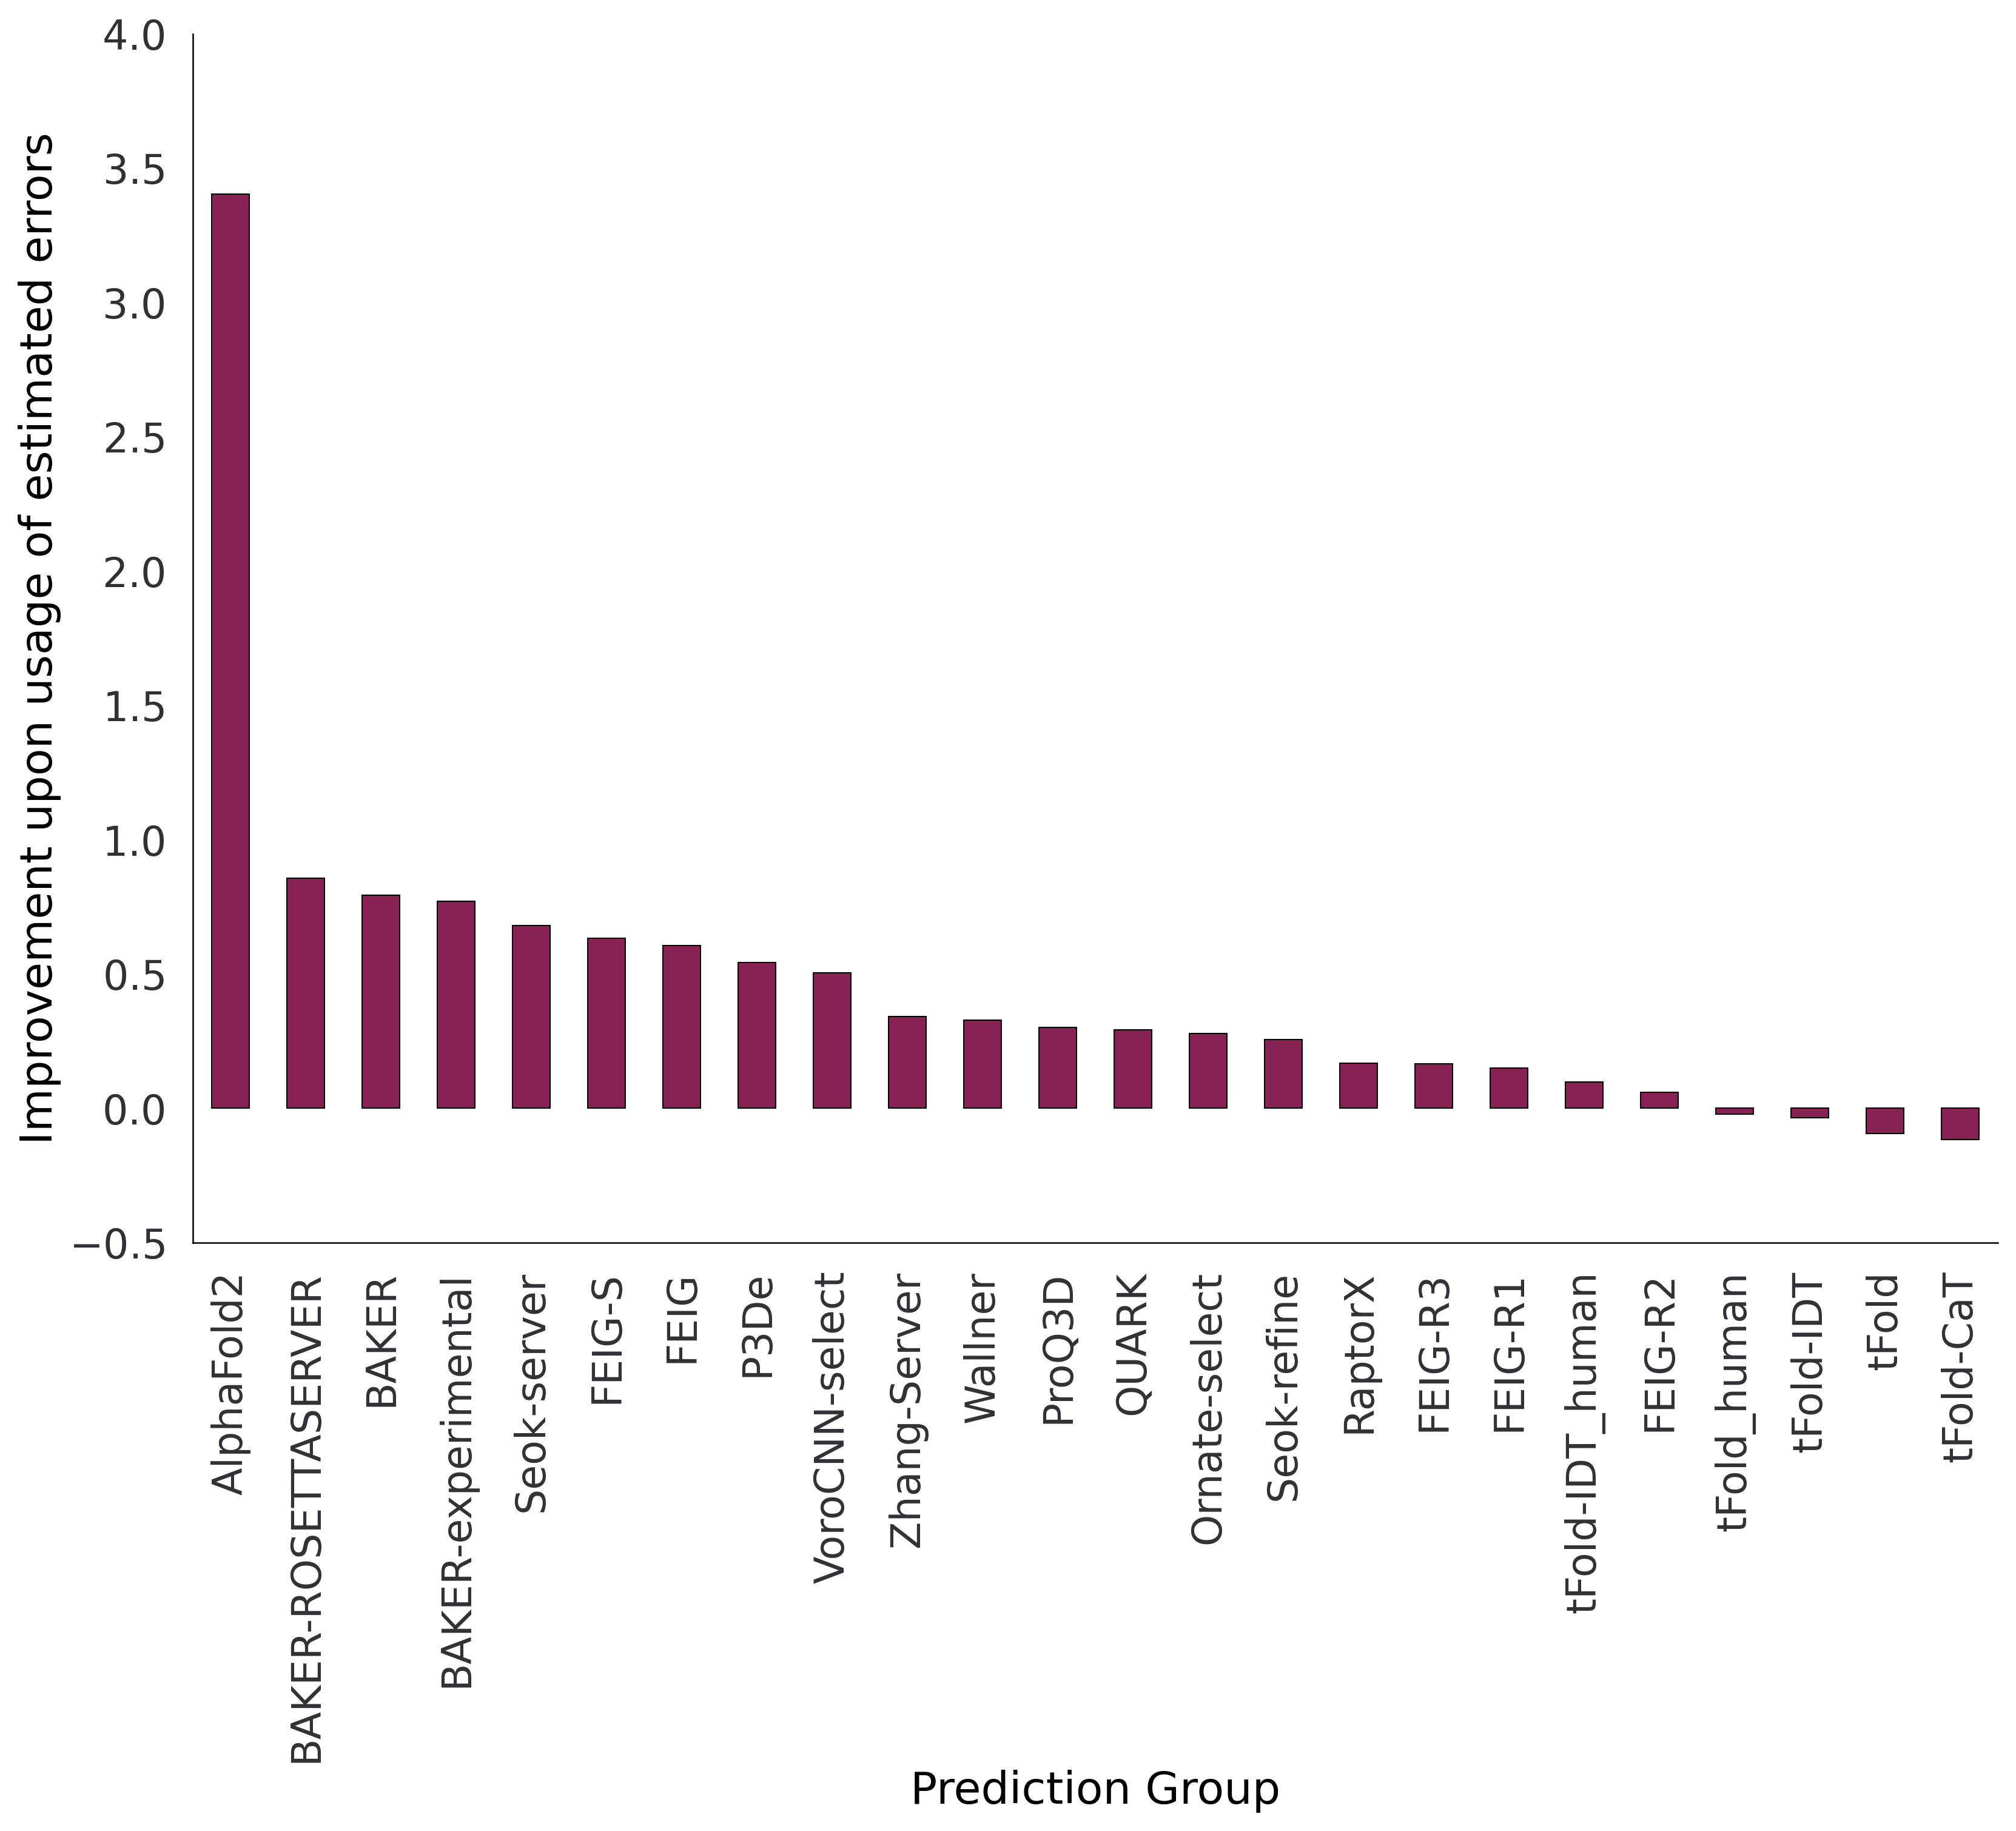

In [86]:
# Now compare in a plot bar how better they did in terms of comparing raw coordinates to raw coordinates and error estimations

plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-poster'])
plt.rcParams['font.family'] = 'Arial'

#display(df_mod1_as_rmsd)
#display(df_mod1_bfac_const)

as_rmsd_by_group = df_mod1_as_rmsd.groupby(['Name_Group'])['reLLG_as_rmsd'].sum()
constant_by_group = df_mod1_bfac_const.groupby(['Name_Group'])['reLLG_bfactor_constant'].sum()
#display(as_rmsd_by_group)
#display(constant_by_group)

merged_df = pd.merge(as_rmsd_by_group,constant_by_group,right_index = True,left_index = True)


# Plot with the two bars [it will not work if the dataframe as the new column difference]
#ax = merged_df.plot.bar(rot=0, title="Comparison between raw coordinates and estimated error",figsize=(40,10))
#ax.set_xlabel("Groups")
#ax.set_ylabel("Sum over reLLG")
#plt.xticks(rotation=90)
#ax.figure.savefig("Comparison_between_raw_coordinates_and_estimated_error_prediction.png",figsize=(40,10),bbox_inches = "tight")
#files.download("Comparison_between_raw_coordinates_and_estimated_error_prediction.png") # This will download it
#plt.show()

merged_df['Difference'] = merged_df['reLLG_as_rmsd'] - merged_df['reLLG_bfactor_constant']
display(merged_df)

# Get the groups corresponding to the best 20 from as rmsd and from the best 20 from bfactor constant
print("Best ones from as_rmsd")
top20rmsd_df = merged_df.nlargest(20,'reLLG_as_rmsd')
top20rmsd = top20rmsd_df.index.values.tolist()
print(top20rmsd)
print("Best ones from bfactor constant")
top20cons_df = merged_df.nlargest(20,'reLLG_bfactor_constant')
top20cons = top20cons_df.index.values.tolist()
print(top20cons)
unique_top = (set(top20rmsd)).union(set(top20cons))
print("Union is ",unique_top)
print("len of union is ",len(unique_top))
unique_list = list(unique_top)
# Filter by this top
merged_df  = merged_df[merged_df.index.isin(unique_list)]


# Plot with the difference
merged_df.sort_values('Difference', ascending=False, inplace=True)
ax = merged_df['Difference'].plot.bar(rot=0,color='#882255')
ax.set_xlabel("Prediction Group")
ax.set_ylabel("Improvement upon usage of estimated errors")
plt.xticks(rotation=90)
#ax.figure.savefig("Comparison_between_raw_coordinates_and_estimated_error_prediction_difference.png",figsize=(40,10),bbox_inches = "tight")
#files.download("Comparison_between_raw_coordinates_and_estimated_error_prediction_difference.png") # This will download it
plt.show()



In [90]:
# Can we see if they got their own ranking right?
# That is, which fraction of their targets were actually right in pointing out model 1 was the best
dict_self_rank_correct = {} 
by_groups = df_all_as_rmsd.groupby(['Name_Group'])
dict_colors = {}
dict_average_zscore = {}
for group in by_groups:
  #print("\n\nChecking maximum value for group ",group[0])
  if group[0] in groups_to_eliminate:
    #print("Skipping this one because in groups_to_eliminate")
    continue # we will skip the groups that will not be ranked
  # In each entry we will save in a list 1 per each time their model 1 was actually the best for a given target and 0 when not
  dict_self_rank_correct[group[0]] = []
  # The color will be chosen differently if average value for reLLG is positive or negative
  mean_zscore = group[1]['reLLG_as_rmsd_zscore'].mean()
  dict_average_zscore[group[0]]=mean_zscore
  if mean_zscore < 0:
    dict_colors[group[0]]='lightcoral'
  else:
    dict_colors[group[0]]='palegreen'
  # I can iterate now by each target for this group and see their 5 models
  by_target = group[1].groupby('Target_Evaluation')
  for targeti in by_target:
    #print('\n\n',targeti)
    #print('sherlock len models' ,len(targeti[1]))
    if len(targeti[1])==5:
        # Now get the best score for all their models for that target
        #print('maximum is ',targeti[1]['reLLG_as_rmsd_zscore'].max())
        index_max = targeti[1]['reLLG_as_rmsd_zscore'].idxmax()
        #print(targeti[1].loc[index_max]['Self_rank'])
        if targeti[1].loc[index_max]['Self_rank'] == '1':
            dict_self_rank_correct[group[0]].append(1)
        else:
            dict_self_rank_correct[group[0]].append(0)
    else: 
        # You skip this target because it did not have 5 models
        continue



#print("SHERLOCK check the dict",dict_average_zscore)    

SHERLOCK check the dict {'191227': -0.07437363410249744, '3D-JIGSAW-SwarmLoop': -0.3741793665229143, 'ACOMPMOD': -0.3946170628993279, 'AILON': -0.34143272130556124, 'AP_1': 0.0016271779406715795, 'AWSEM-CHEN': -0.37123593390110843, 'AWSEM-Suite': -0.29221443165547445, 'AlphaFold2': 8.279941472447733, 'BAKER': 0.6062640704171008, 'BAKER-ROBETTA': -0.018532181979210763, 'BAKER-ROSETTASERVER': 0.4156889380669282, 'BAKER-experimental': 0.6714271203695729, 'BaiduUSA': -0.33240537435313355, 'Bates_BMM': -0.05960284924001312, 'BhageerathH-Plus': -0.36320877501410026, 'Bhattacharya': -0.03162900425997639, 'Bilbul2020': -0.36561213116690616, 'CAO-QA1': -0.12681784209759295, 'CAO-SERVER': -0.38694193017047396, 'CATHER': -0.2639376716244666, 'CUTSP': -0.2418648801882489, 'DATE': -0.024537833586977364, 'DELCLAB': -0.36335066875373717, 'DeepPotential': -0.042590607176438346, 'DellaCorteLab': -0.015698828234394373, 'Destini': -0.3641684122331436, 'E2E': -0.23093960266459318, 'EMAP_CHAE': 0.173623808

,Group,Percentage,Z-score
0,Risoluto,47.368421,-0.353753
1,MUFOLD2,45.263158,-0.348505
2,CAO-SERVER,44.791667,-0.386942
3,CATHER,44.791667,-0.263938
4,BAKER,41.304348,0.606264
...,...,...,...
92,tFold_human,13.043478,0.139947
93,E2E,12.500000,-0.230940
94,CUTSP,12.500000,-0.241865
95,CAO-QA1,10.869565,-0.126818


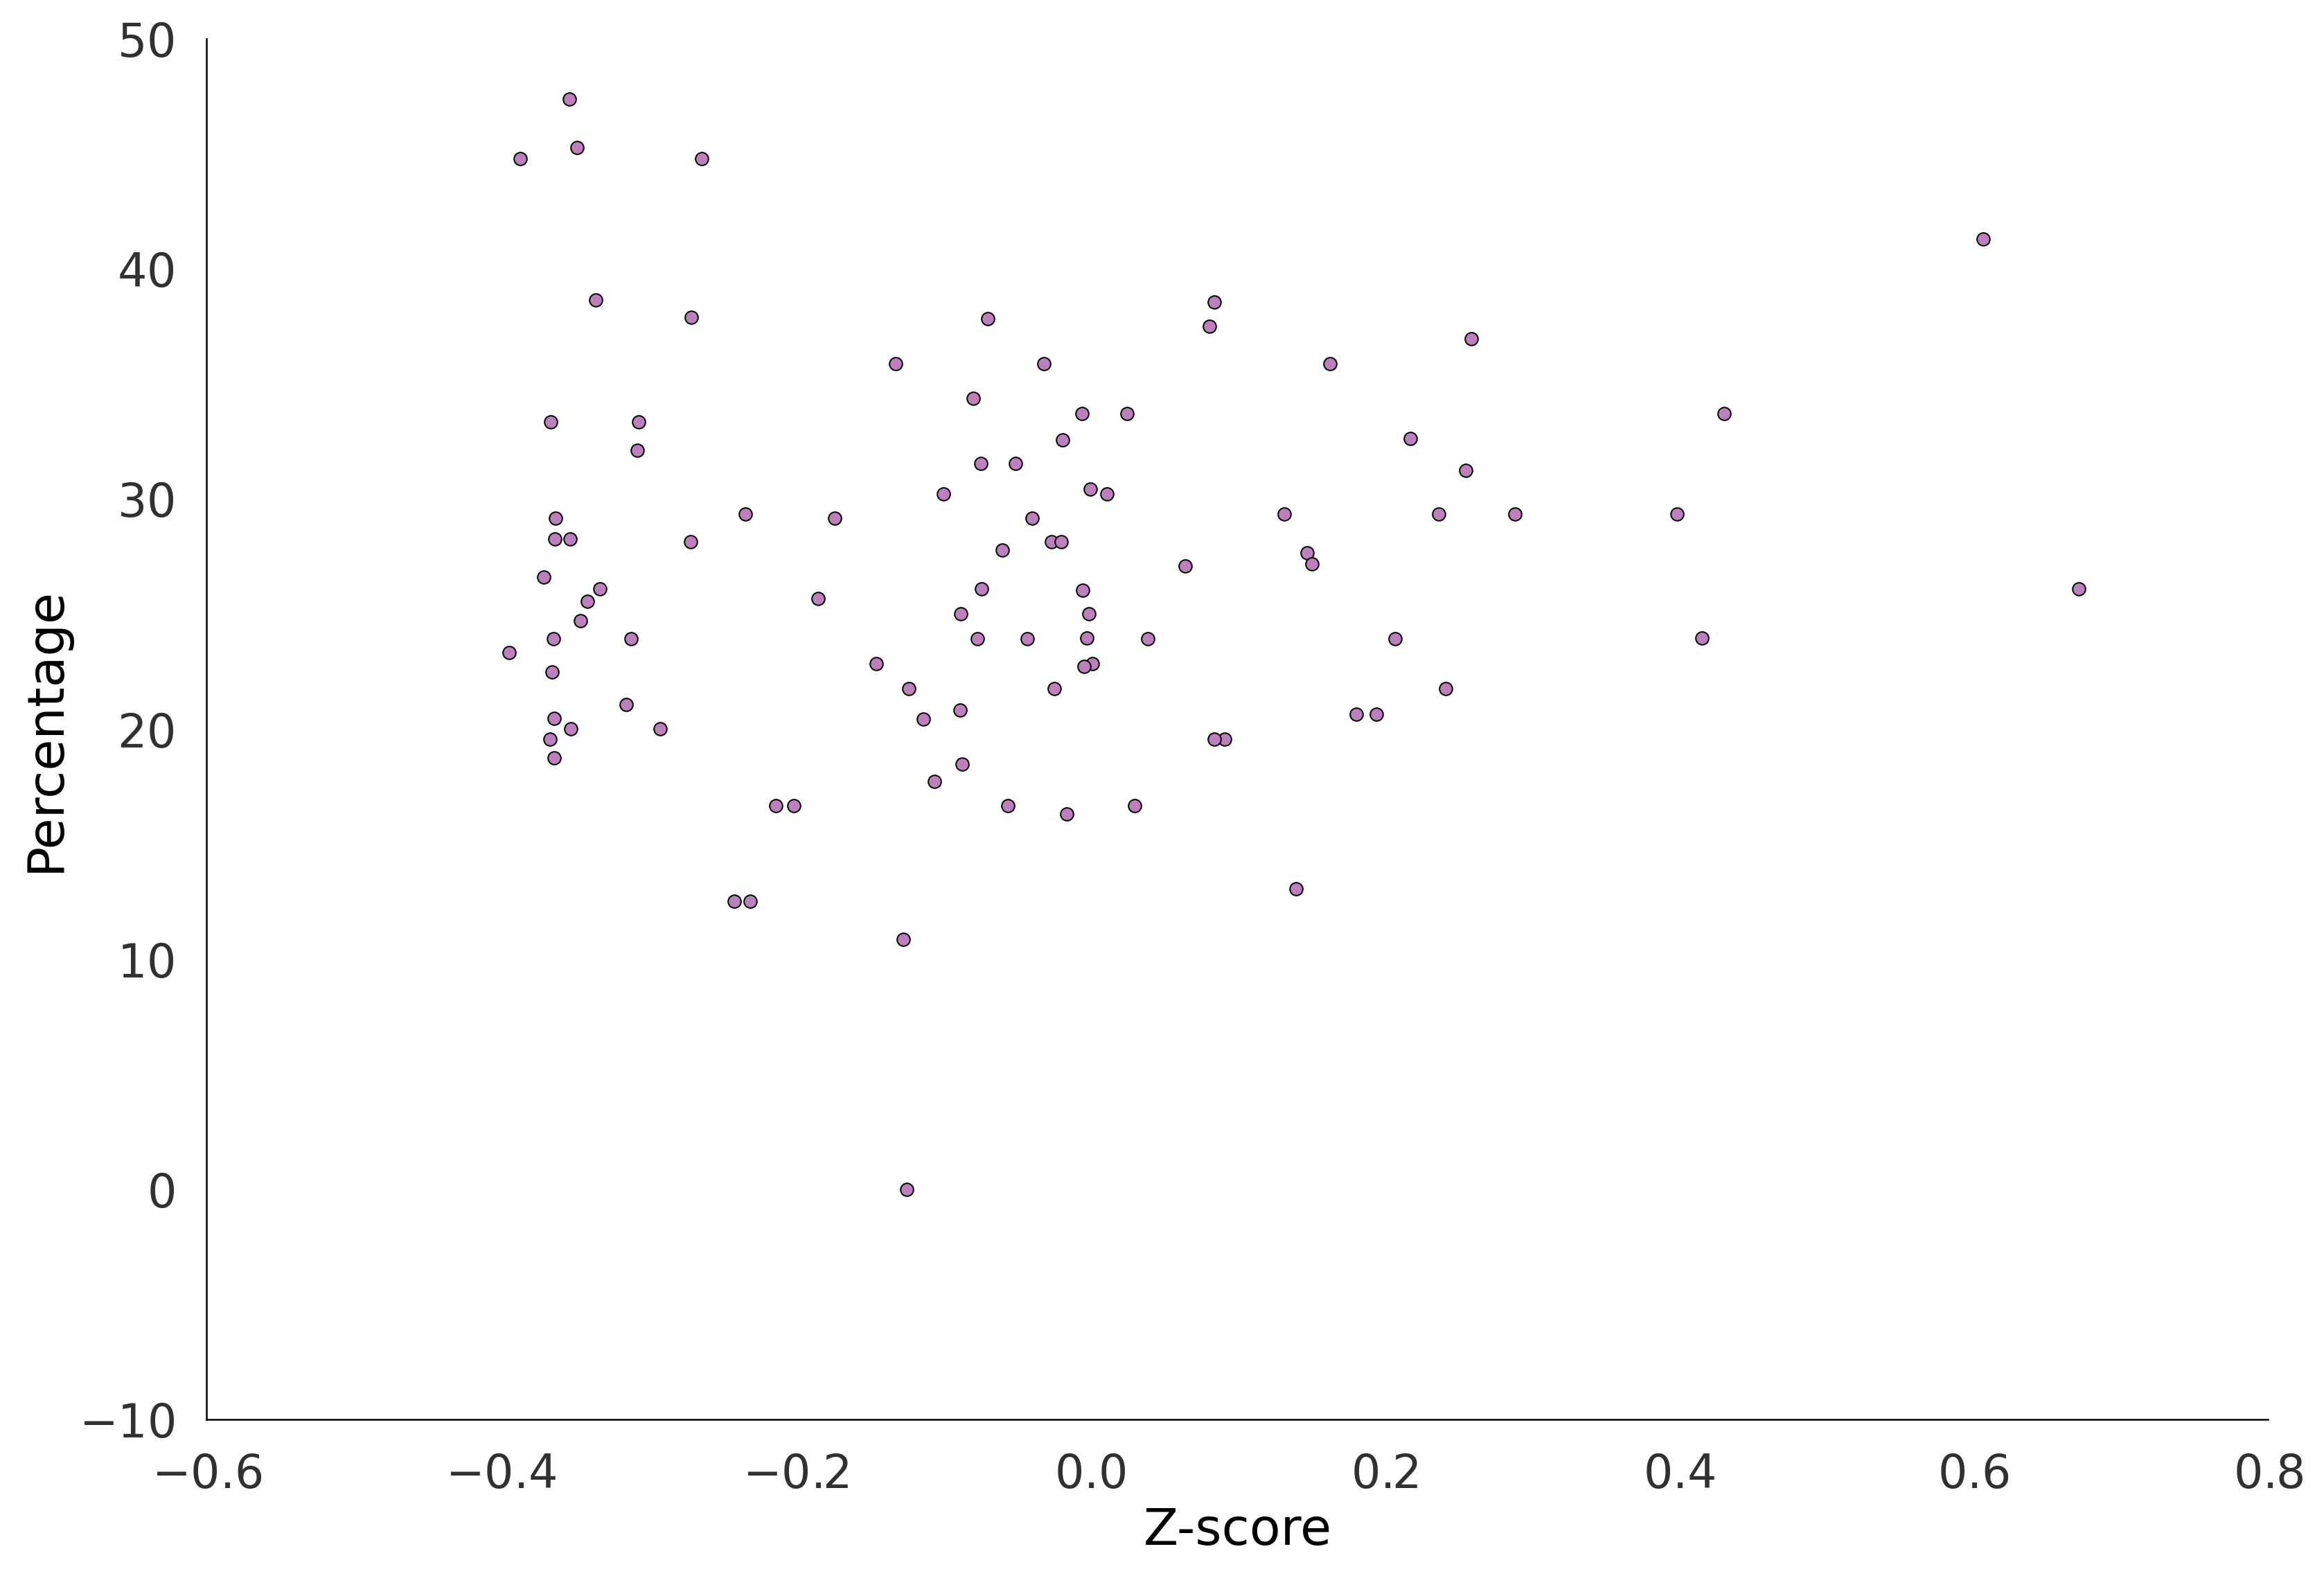

In [97]:

plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-poster'])
plt.rcParams['font.family'] = 'Arial'

rank_list = []
for keygroup in dict_self_rank_correct.keys():
  #print("SHERLOCK dict_self_rank_correct[keygroup]",dict_self_rank_correct[keygroup])
  #print("SHERLOCK len(dict_self_rank_correct[keygroup])",len(dict_self_rank_correct[keygroup]))
  total = len(dict_self_rank_correct[keygroup])
  if total > 0:
      positives = dict_self_rank_correct[keygroup].count(1) # how many times was the first
      percentage = (positives * 100) / total
      #print('\nGroup ',keygroup,' had ',positives,' out of ',total,' targets with 5 models correctly ranked as first, giving a % of ',percentage)
      rank_list.append((keygroup,percentage))
  else:
    continue

#sorted_rank_list = sorted(rank_list,key=lambda x: x[1], reverse=True)
#for ele in sorted_rank_list:
  #print(ele)

df_for_plot = pd.DataFrame(rank_list, columns =['Group', 'Percentage'])
df_for_plot.sort_values(by=['Percentage'],ascending=False,inplace=True)
#df_for_plot.index = df_for_plot['Group']
#display(df_for_plot)

# Now do a scatter plot
df_zscore = pd.DataFrame.from_dict(dict_average_zscore,orient='index')
df_zscore['Group'] = df_zscore.index
df_zscore.columns=['Z-score','Group']
#display(df_zscore)
merge_for_scatter = pd.merge(df_for_plot,df_zscore,on='Group')
# Testing if removing alphafold makes it more informative
merge_for_scatter = merge_for_scatter.loc[merge_for_scatter['Group']!="AlphaFold2"]
display(merge_for_scatter)
ax = merge_for_scatter.plot.scatter(x="Z-score",y="Percentage")
plt.show()

# Now do a bar plot
#pd.DataFrame.from_dict(data, orient='index')
#df_color = pd.DataFrame.from_dict(dict_colors,orient='index')
#df_color['Group'] = df_color.index
#df_color.columns=['Colour','Group']
#display(df_color)
#col = []
#for val in df_color['Colour']:
#    col.append(val)
#print("col ",col)
#x = (range(len(df_for_plot["Percentage"])))
#new_x = [2*i for i in x]
#ax=df_for_plot.plot.bar(color=[col],figsize=(40,20))
#ax.get_legend().remove()
#plt.xlabel("Prediction Group",fontsize=12)
#plt.xticks(fontsize=12)
#plt.ylabel("Percentage of correctly ranked first models")
#plt.show()

